# <center> **Audio Classification using ANN/CNN**


# **Introduction**

In this project, I employed deep learning techniques to classify audio recordings using artificial neural networks (ANN), 1-Dimensional Convolutional Neural Networks (1-D CNN), and 2-Dimensional Convolutional Neural Networks (2-D CNN). The dataset utilized, UrbanSound8K from Kaggle, comprises 8,732 labeled sound excerpts, each less than 4 seconds long, spanning 10 urban sound categories: air conditioner, car horn, children playing, dog bark, drilling, engine idling, gun shot, jackhammer, siren, and street music. These categories are part of a broader urban sound taxonomy.

## Importing the required modules


In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

## Reading the data


In [ ]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

# reading the files
audio_dataset_path = "../input/urbansound8k/"

# loading the csv
meta_data = pd.read_csv("../input/urbansound8k/UrbanSound8K.csv")
meta_data["class"] = meta_data["class"].replace(
    to_replace="air_conditioner", value="Air Conditioner"
)
meta_data["class"] = meta_data["class"].replace(to_replace="car_horn", value="Car Horn")
meta_data["class"] = meta_data["class"].replace(
    to_replace="children_playing", value="Children Playing"
)
meta_data["class"] = meta_data["class"].replace(to_replace="dog_bark", value="Dog Bark")
meta_data["class"] = meta_data["class"].replace(to_replace="drilling", value="Drilling")
meta_data["class"] = meta_data["class"].replace(
    to_replace="engine_idling", value="Engine Idling"
)
meta_data["class"] = meta_data["class"].replace(to_replace="gun_shot", value="Gun Shot")
meta_data["class"] = meta_data["class"].replace(
    to_replace="jackhammer", value="Jackhammer"
)
meta_data["class"] = meta_data["class"].replace(to_replace="siren", value="Siren")
meta_data["class"] = meta_data["class"].replace(
    to_replace="street_music", value="Street Music"
)

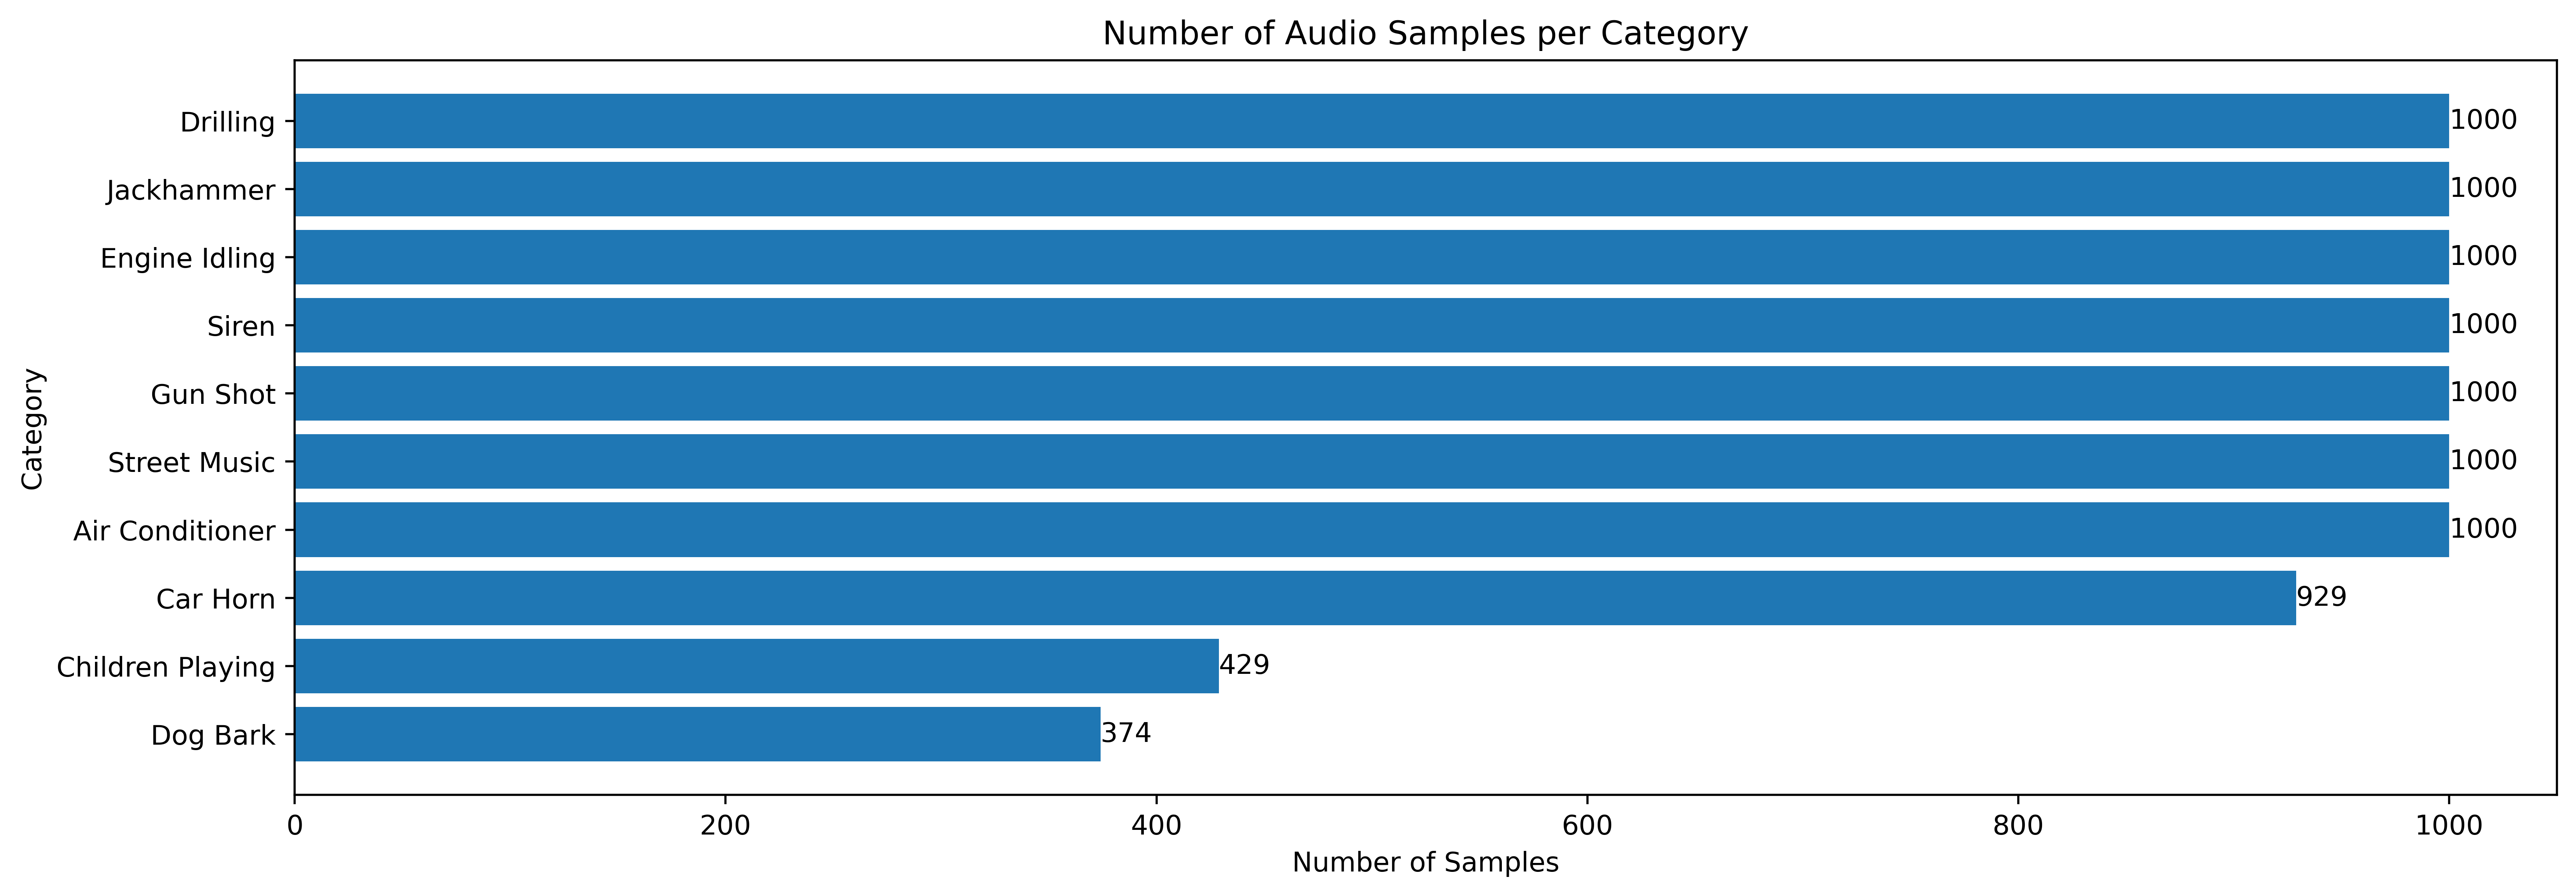

In [5]:
x = meta_data["class"].unique()
y = meta_data["class"].value_counts(ascending=True)
ind = np.arange(len(y))

fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.show()

# **MFCC Visualization**


Mel-frequency cepstral coefficients (MFCCs) are a type of feature widely used in audio signal processing, particularly for speech and music analysis. They effectively capture the timbral aspects of sound, making them especially useful for tasks like speech recognition, speaker identification, and audio classification.

In this section, I display the MFCC (Mel-frequency cepstral coefficients) visualizations for various urban sounds, including an air conditioner, car horn, children playing, dog bark, drilling, engine idling, gun shot, jackhammer, siren, and street music. These visualizations help illustrate the distinctive spectral properties of each sound category. 

In [7]:
plt.rcParams["figure.figsize"] = (5, 2.5)
plt.rcParams["figure.dpi"] = 200

<function matplotlib.pyplot.show(close=None, block=None)>

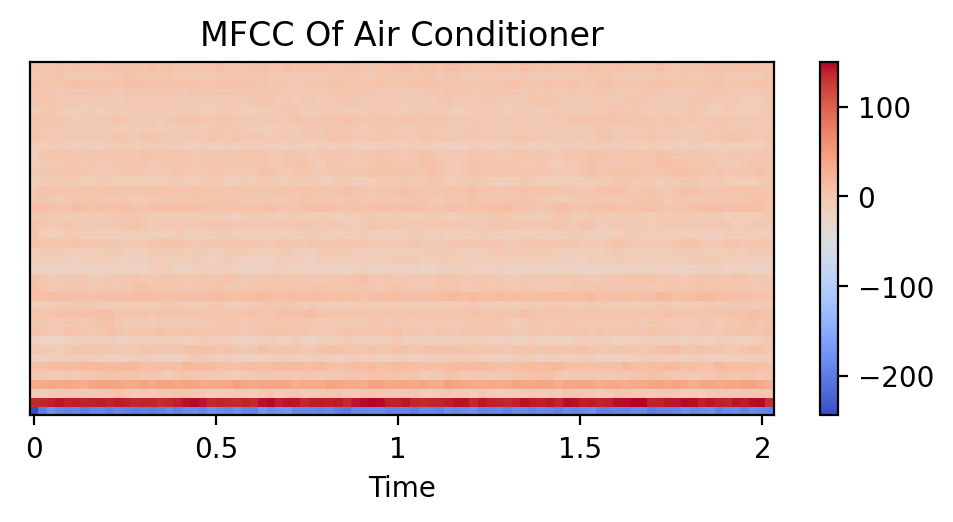

In [8]:
audio_path = audio_dataset_path + "fold1/127873-0-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Air Conditioner")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

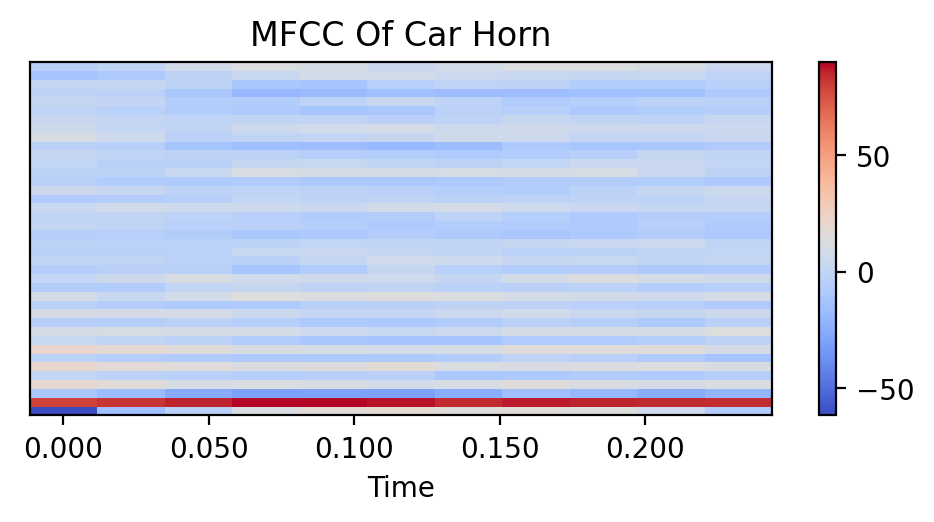

In [9]:
audio_path = audio_dataset_path + "fold1/156194-1-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Car Horn")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

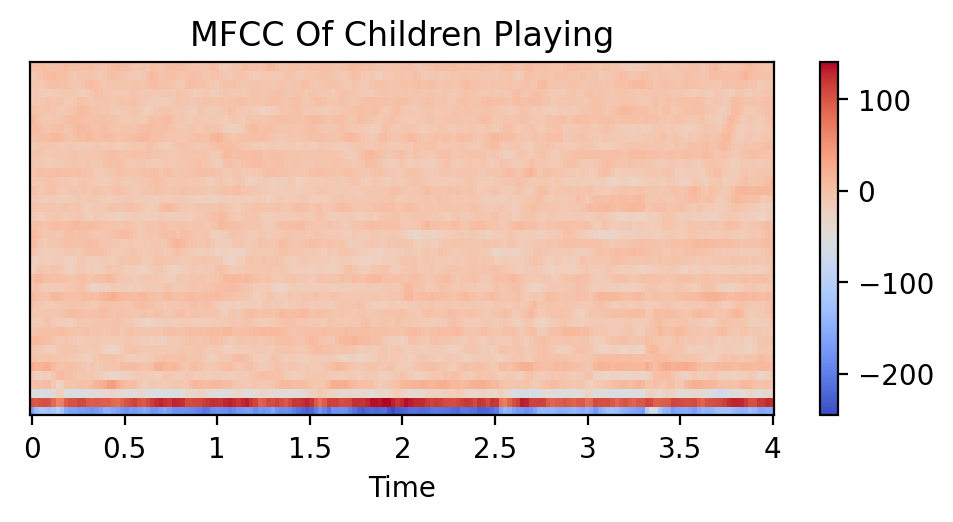

In [11]:
audio_path = audio_dataset_path + "fold1/105415-2-0-1.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Children Playing")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

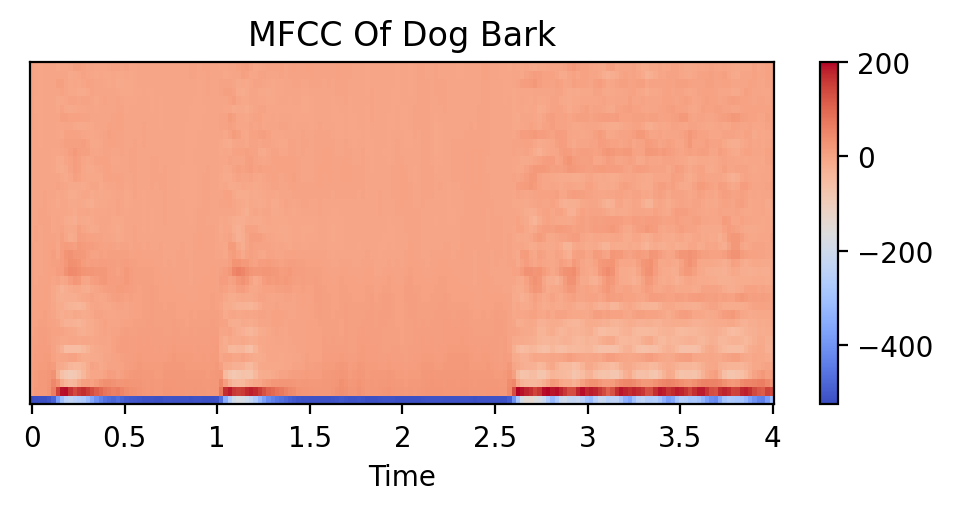

In [12]:
audio_path = audio_dataset_path + "fold1/101415-3-0-2.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Dog Bark")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

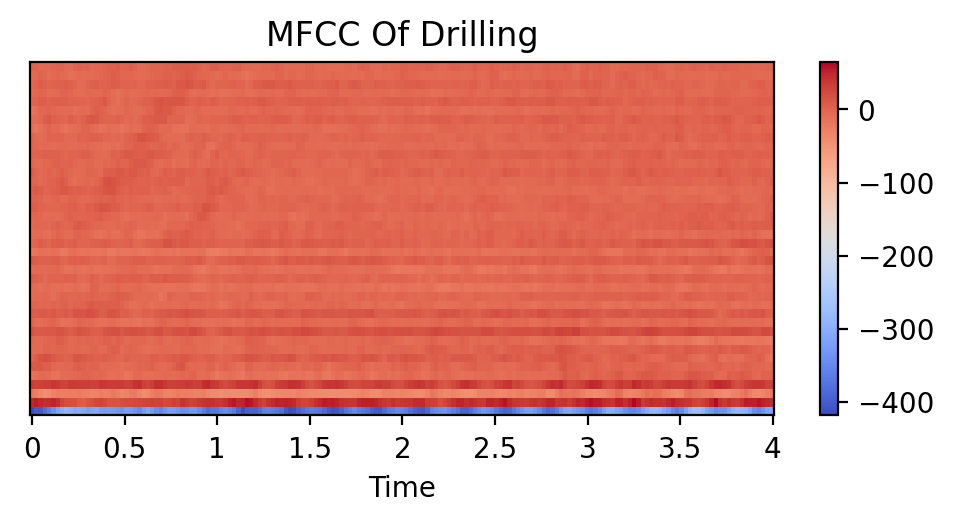

In [13]:
audio_path = audio_dataset_path + "fold1/14113-4-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Drilling")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

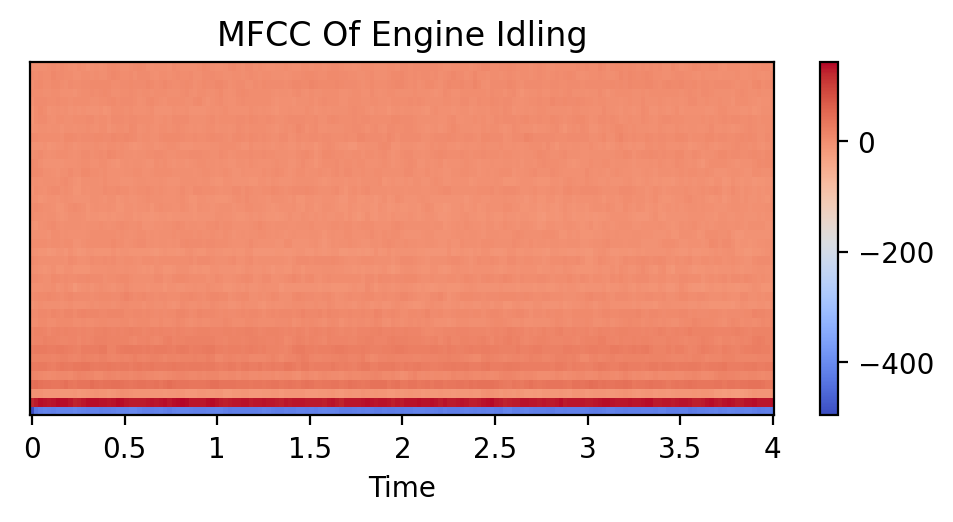

In [14]:
audio_path = audio_dataset_path + "fold1/103258-5-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Engine Idling")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

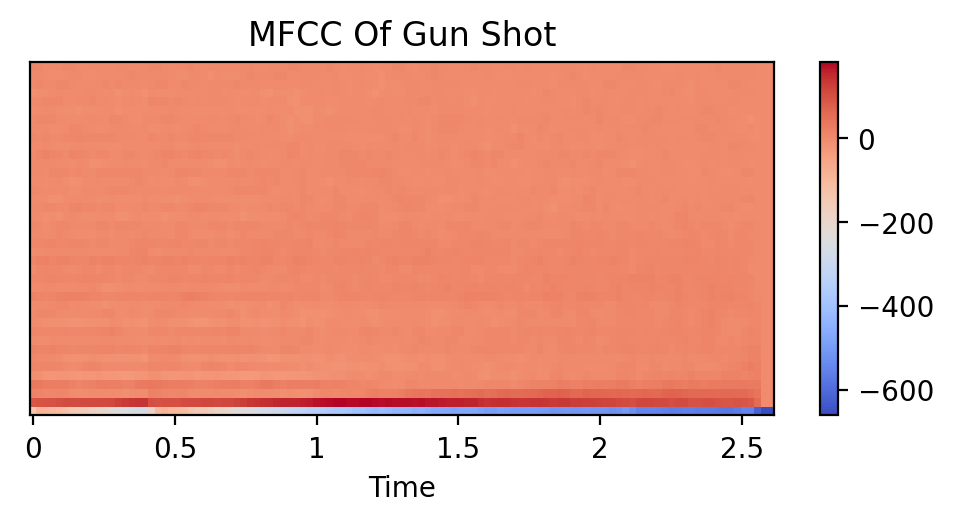

In [15]:
audio_path = audio_dataset_path + "fold1/102305-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Gun Shot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

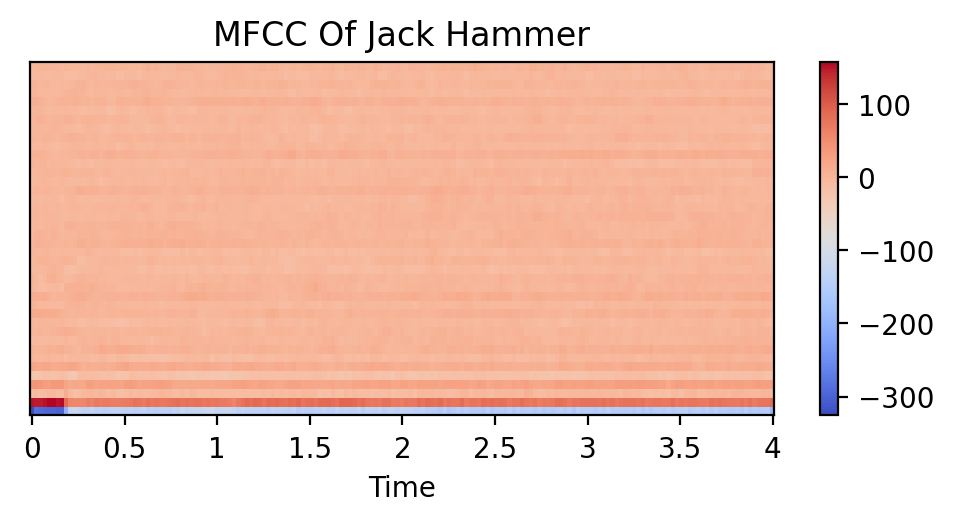

In [16]:
audio_path = audio_dataset_path + "fold1/103074-7-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Jack Hammer")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

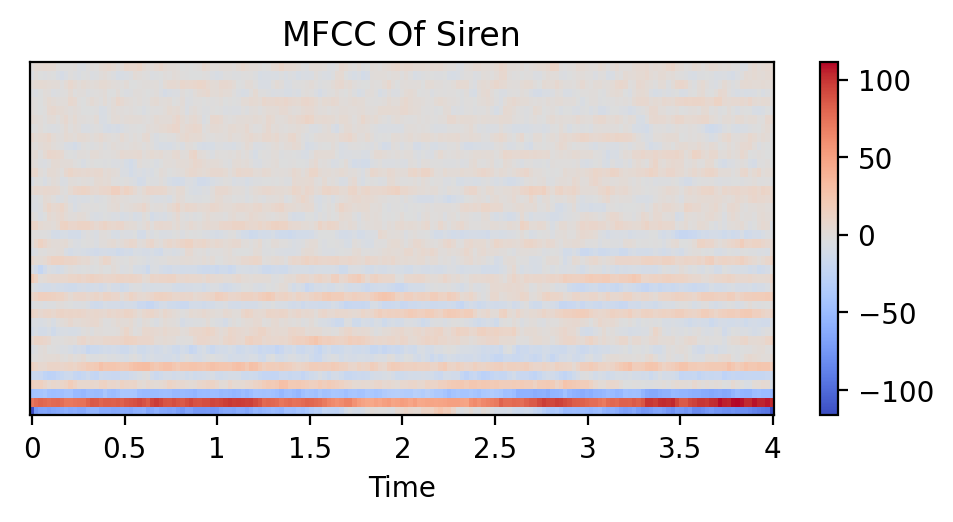

In [17]:
audio_path = audio_dataset_path + "fold1/106905-8-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Siren")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

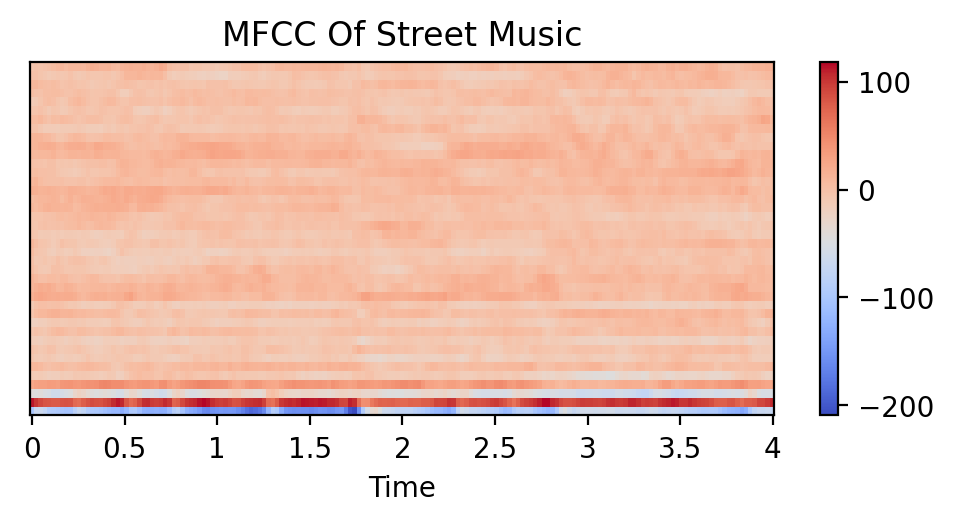

In [18]:
audio_path = audio_dataset_path + "fold1/108041-9-0-11.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Street Music")
plt.show

# **Feature Extraction and Database Building**

I used the Librosa library to preprocess the audio files for this project. The process involves iterating through each fold of the dataset and extracting features from each audio file using Librosa's MFCC (Mel-frequency cepstral coefficients) function. The extracted features are then appended to a list, which is subsequently converted into a DataFrame for further analysis and model training.

In [19]:
extracted = []

for index_num, row in tqdm(meta_data.iterrows()):
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]) + "/",
        str(row["slice_file_name"]),
    )
    final_class_labels = row["class"]
    audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    scaled_feature = np.mean(feature.T, axis=0)
    extracted.append([scaled_feature, final_class_labels])

8732it [17:07,  8.50it/s]


# **Data Preprocessing**


First, load the data into a DataFrame to handle it effectively. Then, extract and store feature arrays using Python's pickle module for efficient serialization. Next, segregate the data into feature sets (X) and target labels (Y). Utilize LabelEncoder() to convert categorical string labels into integers, facilitating model training. Finally, split the dataset into training and testing sets to evaluate the model's performance accurately. 

In [25]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df.pkl")

# create a new dataframe
final = pd.DataFrame(extracted, columns=["feature", "class"])
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())

# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


# **Model 1 - ANN**


## Building the model


In [26]:
num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              129000    
_________________________________________________________________
dense_1 (Dense)              (None, 750)               750750    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5

## Training the model


In [28]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250
219/219 [==============================] - 3s 10ms/step - loss: 1.9088 - accuracy: 0.4511 - val_loss: 1.1849 - val_accuracy: 0.5781
Epoch 2/250
219/219 [==============================] - 2s 9ms/step - loss: 0.9610 - accuracy: 0.6850 - val_loss: 0.7796 - val_accuracy: 0.7573
Epoch 3/250
219/219 [==============================] - 2s 9ms/step - loss: 0.7012 - accuracy: 0.7744 - val_loss: 0.5756 - val_accuracy: 0.8351
Epoch 4/250
219/219 [==============================] - 2s 9ms/step - loss: 0.5284 - accuracy: 0.8220 - val_loss: 0.5994 - val_accuracy: 0.8117
Epoch 5/250
219/219 [==============================] - 2s 9ms/step - loss: 0.4422 - accuracy: 0.8505 - val_loss: 0.4948 - val_accuracy: 0.8609
Epoch 6/250
219/219 [==============================] - 2s 9ms/step - loss: 0.3423 - accuracy: 0.8839 - val_loss: 0.5029 - val_accuracy: 0.8500
Epoch 7/250
219/219 [==============================] - 2s 11ms/step - loss: 0.3145 - accuracy: 0.8974 - val_loss: 0.3880 - val_accuracy: 0.88

## Results


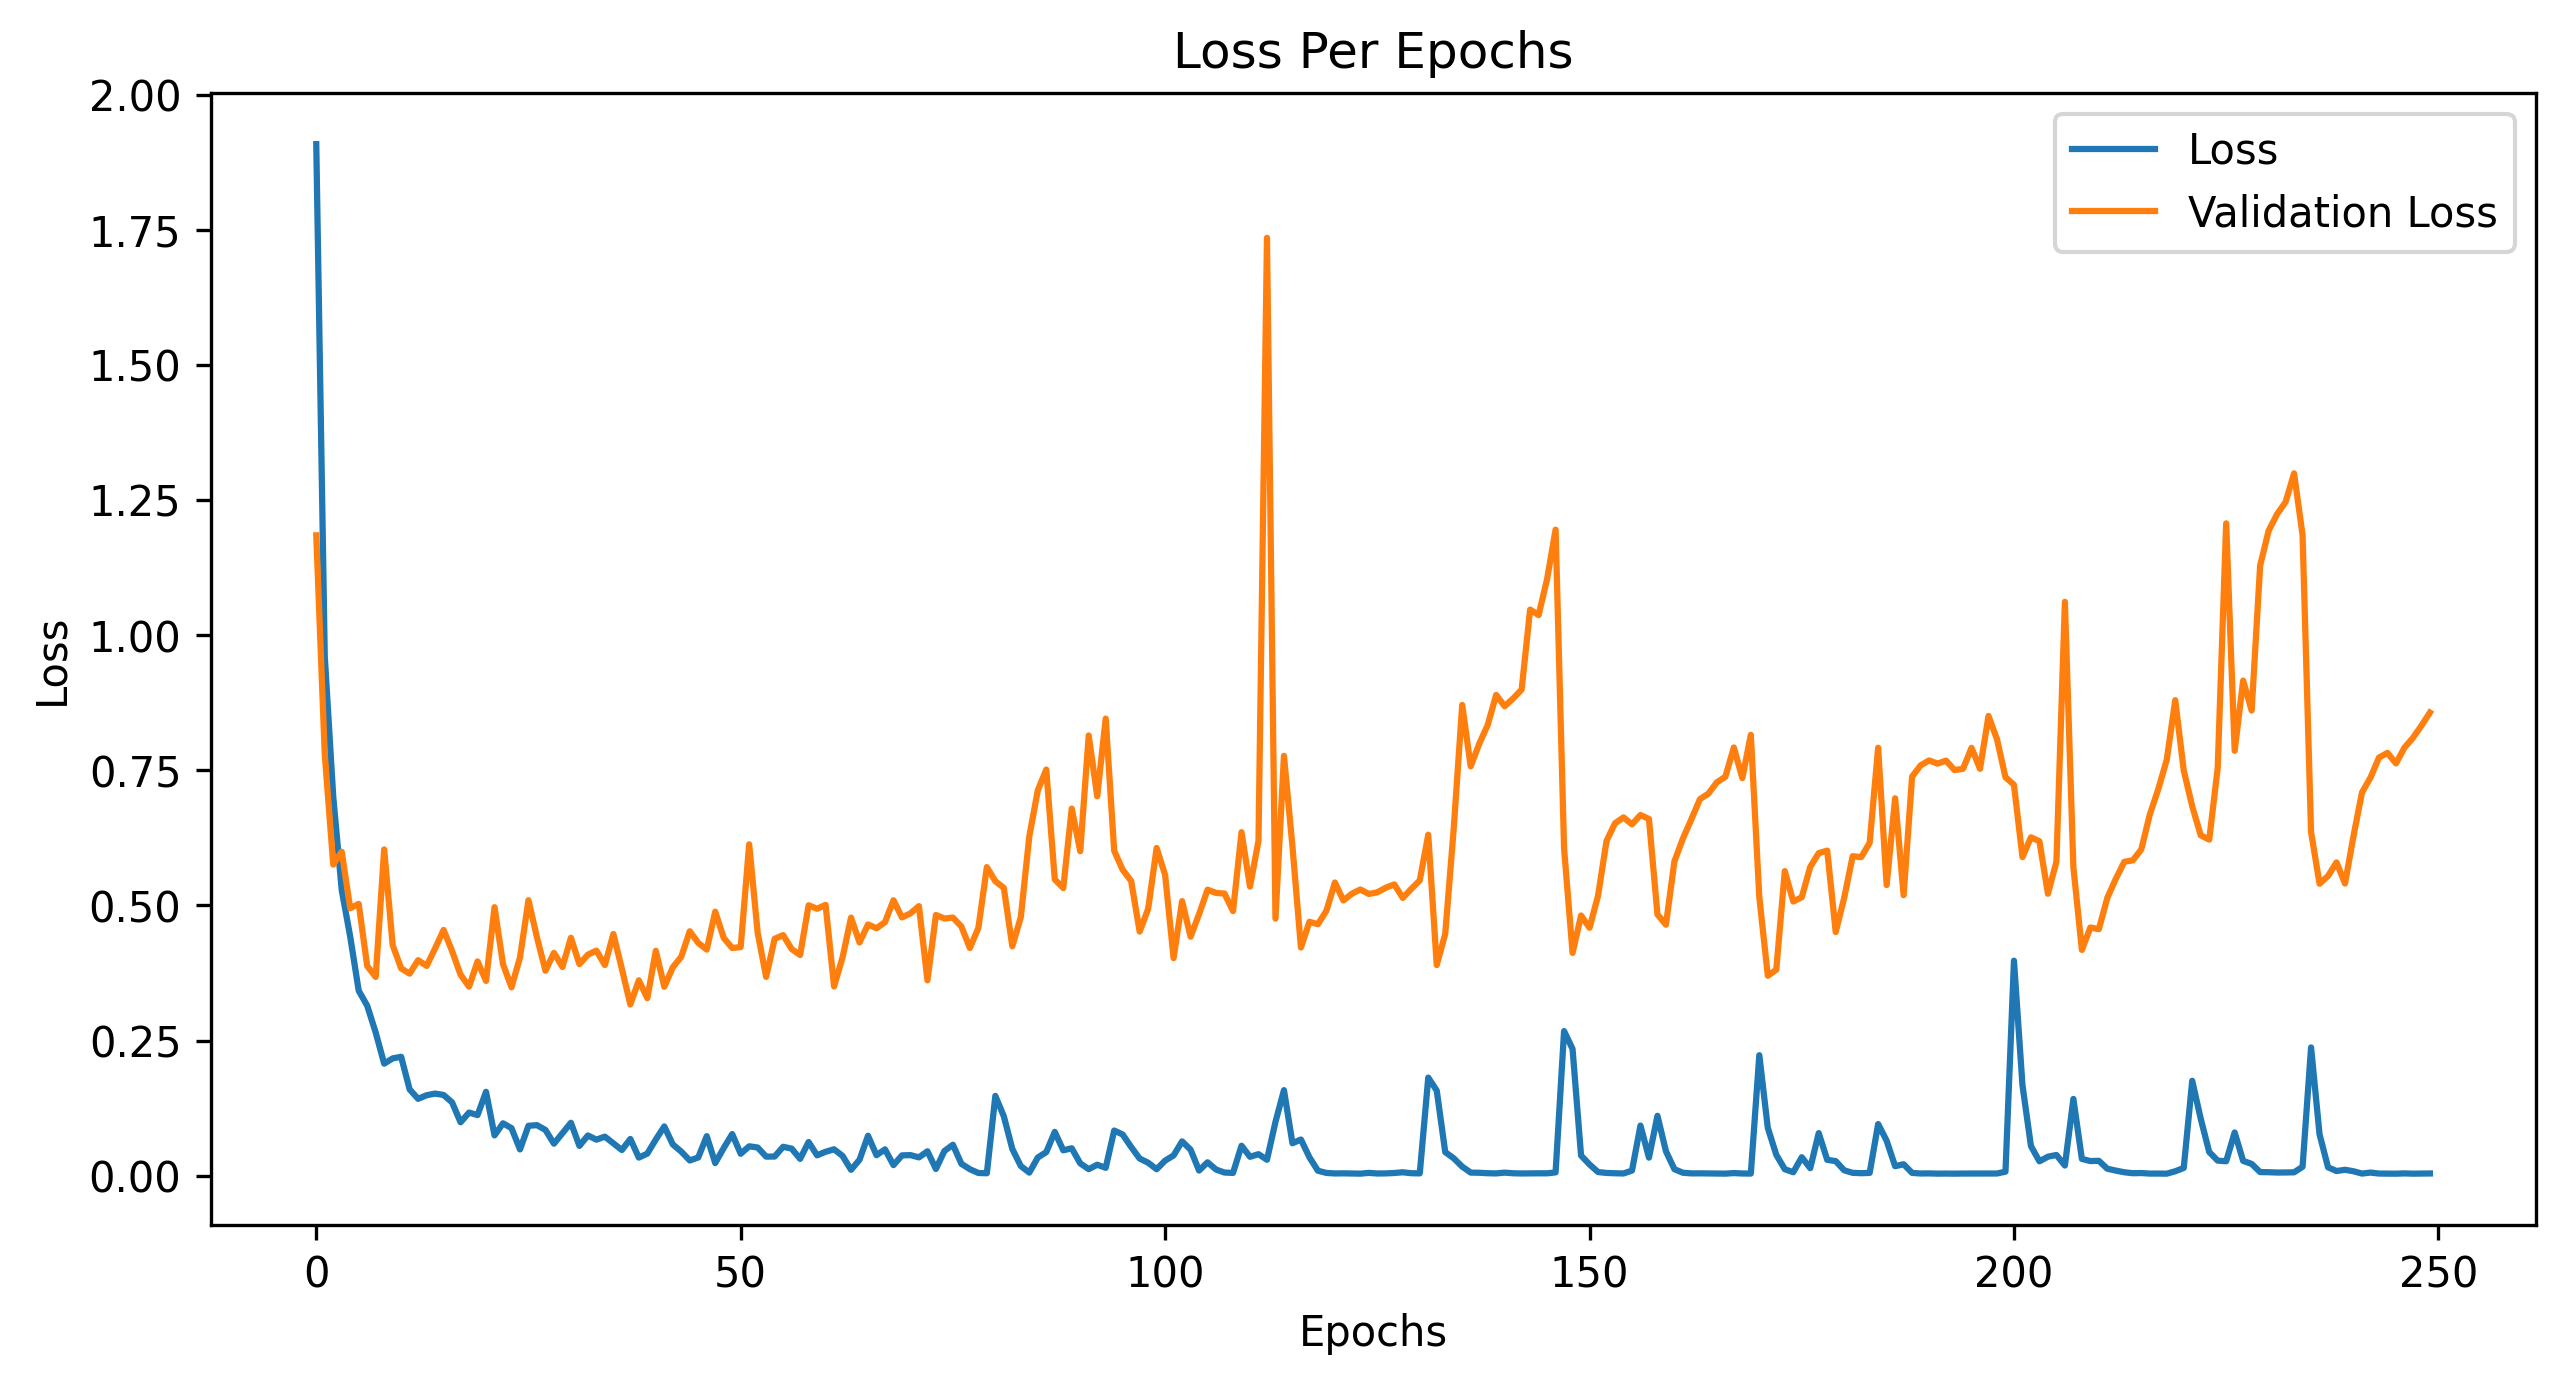

In [29]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

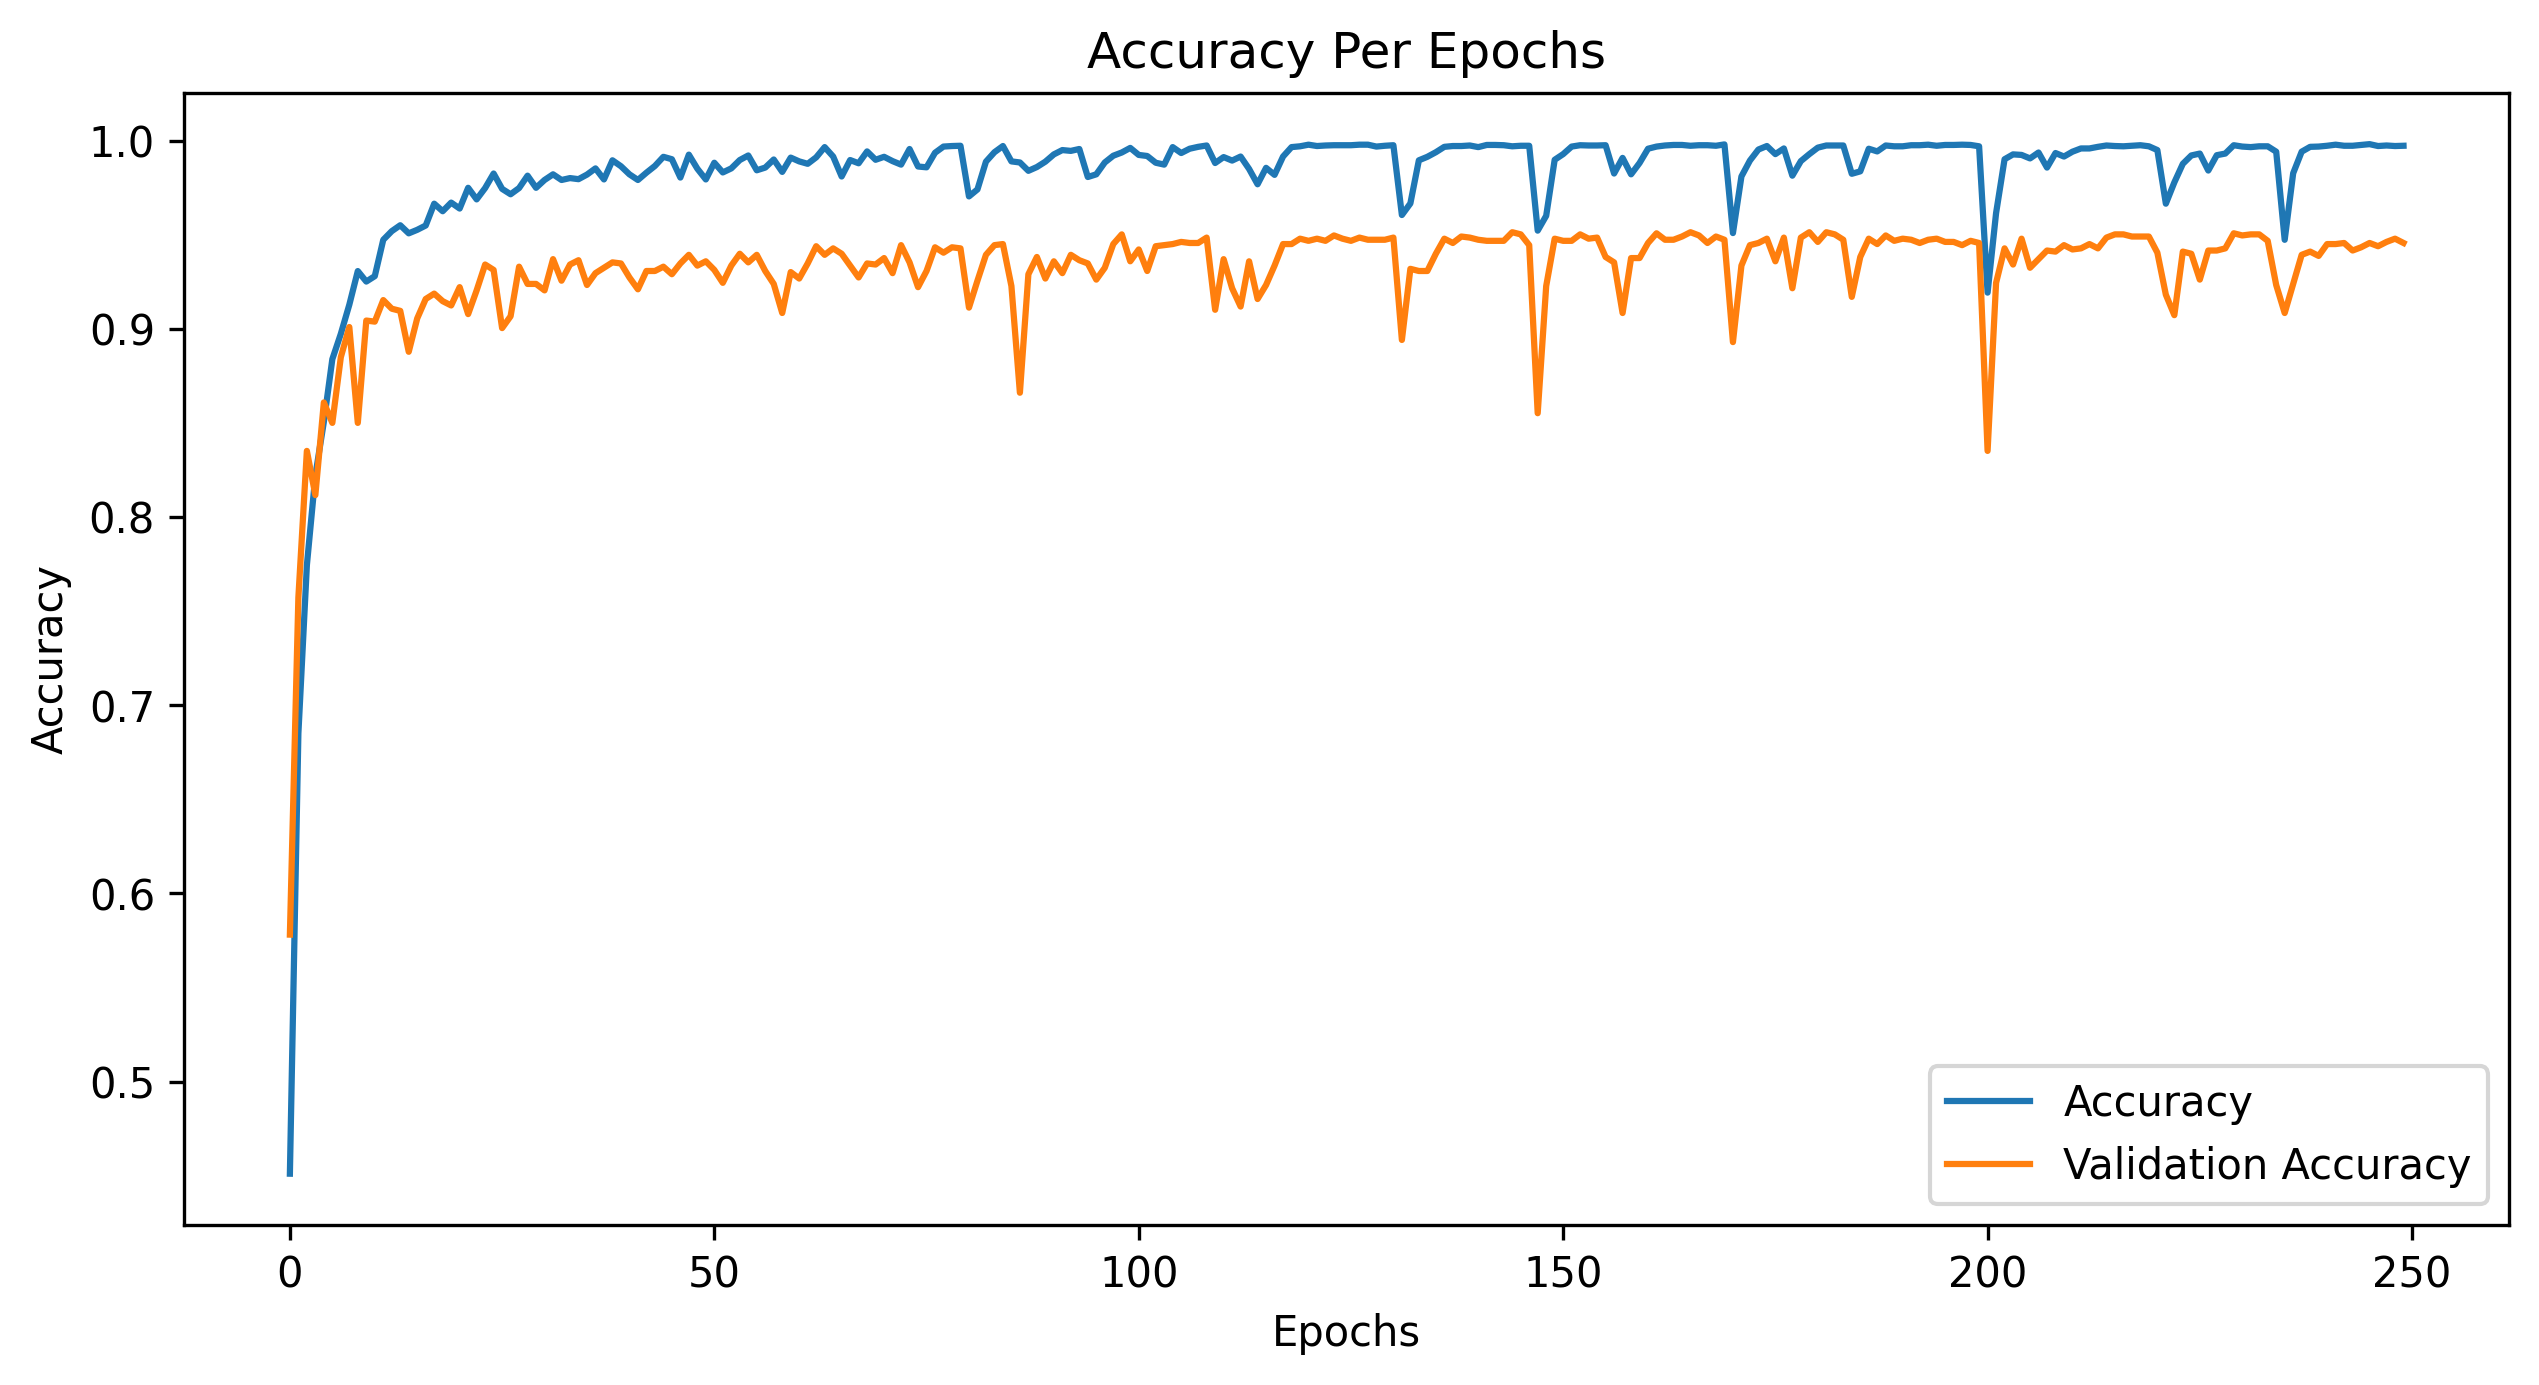

In [30]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## ANN Prediction Function


In [32]:
def ANN_Prediction(file_name):
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    feature_scaled = np.mean(feature.T, axis=0)
    prediction_feature = np.array([feature_scaled])
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    predicted_class = le.inverse_transform(predicted_vector)
    print("ANN has predicted the class as  --> ", predicted_class[0])

## Testing the Model


In [2]:
# fold8/103076-3-0-0.wav - Dog Bark
file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"

ANN_Prediction(file_name)

ANN has predicted the class as  -->  Dog Bark


# **Model 2 - CNN1D**


## Preprocessing


In [34]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)


Number of samples for Train set : 6286
Number of samples for Validation set : 1572
Number of samples for Test set : 874
Shape of X Train (6286, 128, 1)
Shape of X Test (874, 128)


## Building the CNN1D Model


In [35]:
CNN1D_Model = Sequential()
CNN1D_Model.add(
    Conv1D(
        256,
        5,
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(xTrain.shape[1], 1),
    )
)
CNN1D_Model.add(BatchNormalization())
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(128, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(64, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Flatten())
CNN1D_Model.add(Dense(units=1024, activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(Dense(units=10, activation="softmax"))
CNN1D_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 128, 256)          1536      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 256)          1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 256)           327936    
_________________________________________________________________
dropout (Dropout)            (None, 64, 256)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 128)          

## Training the Model


In [37]:
CNN1D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

t0 = time.time()

CNN1D_Results = CNN1D_Model.fit(
    xTrain, yTrain, batch_size=64, epochs=250, validation_data=(xvalid, yvalid)
)

CNN1D_Model.save("Model2.h5")
print("CNN1D Model Saved")
train_hist_m2 = pd.DataFrame(CNN1D_Results.history)
train_m2 = round(time.time() - t0, 3)

Epoch 1/250
99/99 [==============================] - 16s 149ms/step - loss: 1.7483 - accuracy: 0.3791 - val_loss: 1.6465 - val_accuracy: 0.4186
Epoch 2/250
99/99 [==============================] - 15s 155ms/step - loss: 1.2208 - accuracy: 0.5652 - val_loss: 1.2978 - val_accuracy: 0.6552
Epoch 3/250
99/99 [==============================] - 14s 146ms/step - loss: 1.0218 - accuracy: 0.6390 - val_loss: 1.0160 - val_accuracy: 0.7449
Epoch 4/250
99/99 [==============================] - 15s 155ms/step - loss: 0.9035 - accuracy: 0.6893 - val_loss: 0.9783 - val_accuracy: 0.6883
Epoch 5/250
99/99 [==============================] - 14s 146ms/step - loss: 0.7968 - accuracy: 0.7292 - val_loss: 0.8116 - val_accuracy: 0.7570
Epoch 6/250
99/99 [==============================] - 15s 156ms/step - loss: 0.6784 - accuracy: 0.7679 - val_loss: 0.6831 - val_accuracy: 0.8034
Epoch 7/250
99/99 [==============================] - 15s 147ms/step - loss: 0.6476 - accuracy: 0.7733 - val_loss: 0.6885 - val_accuracy:

## Results


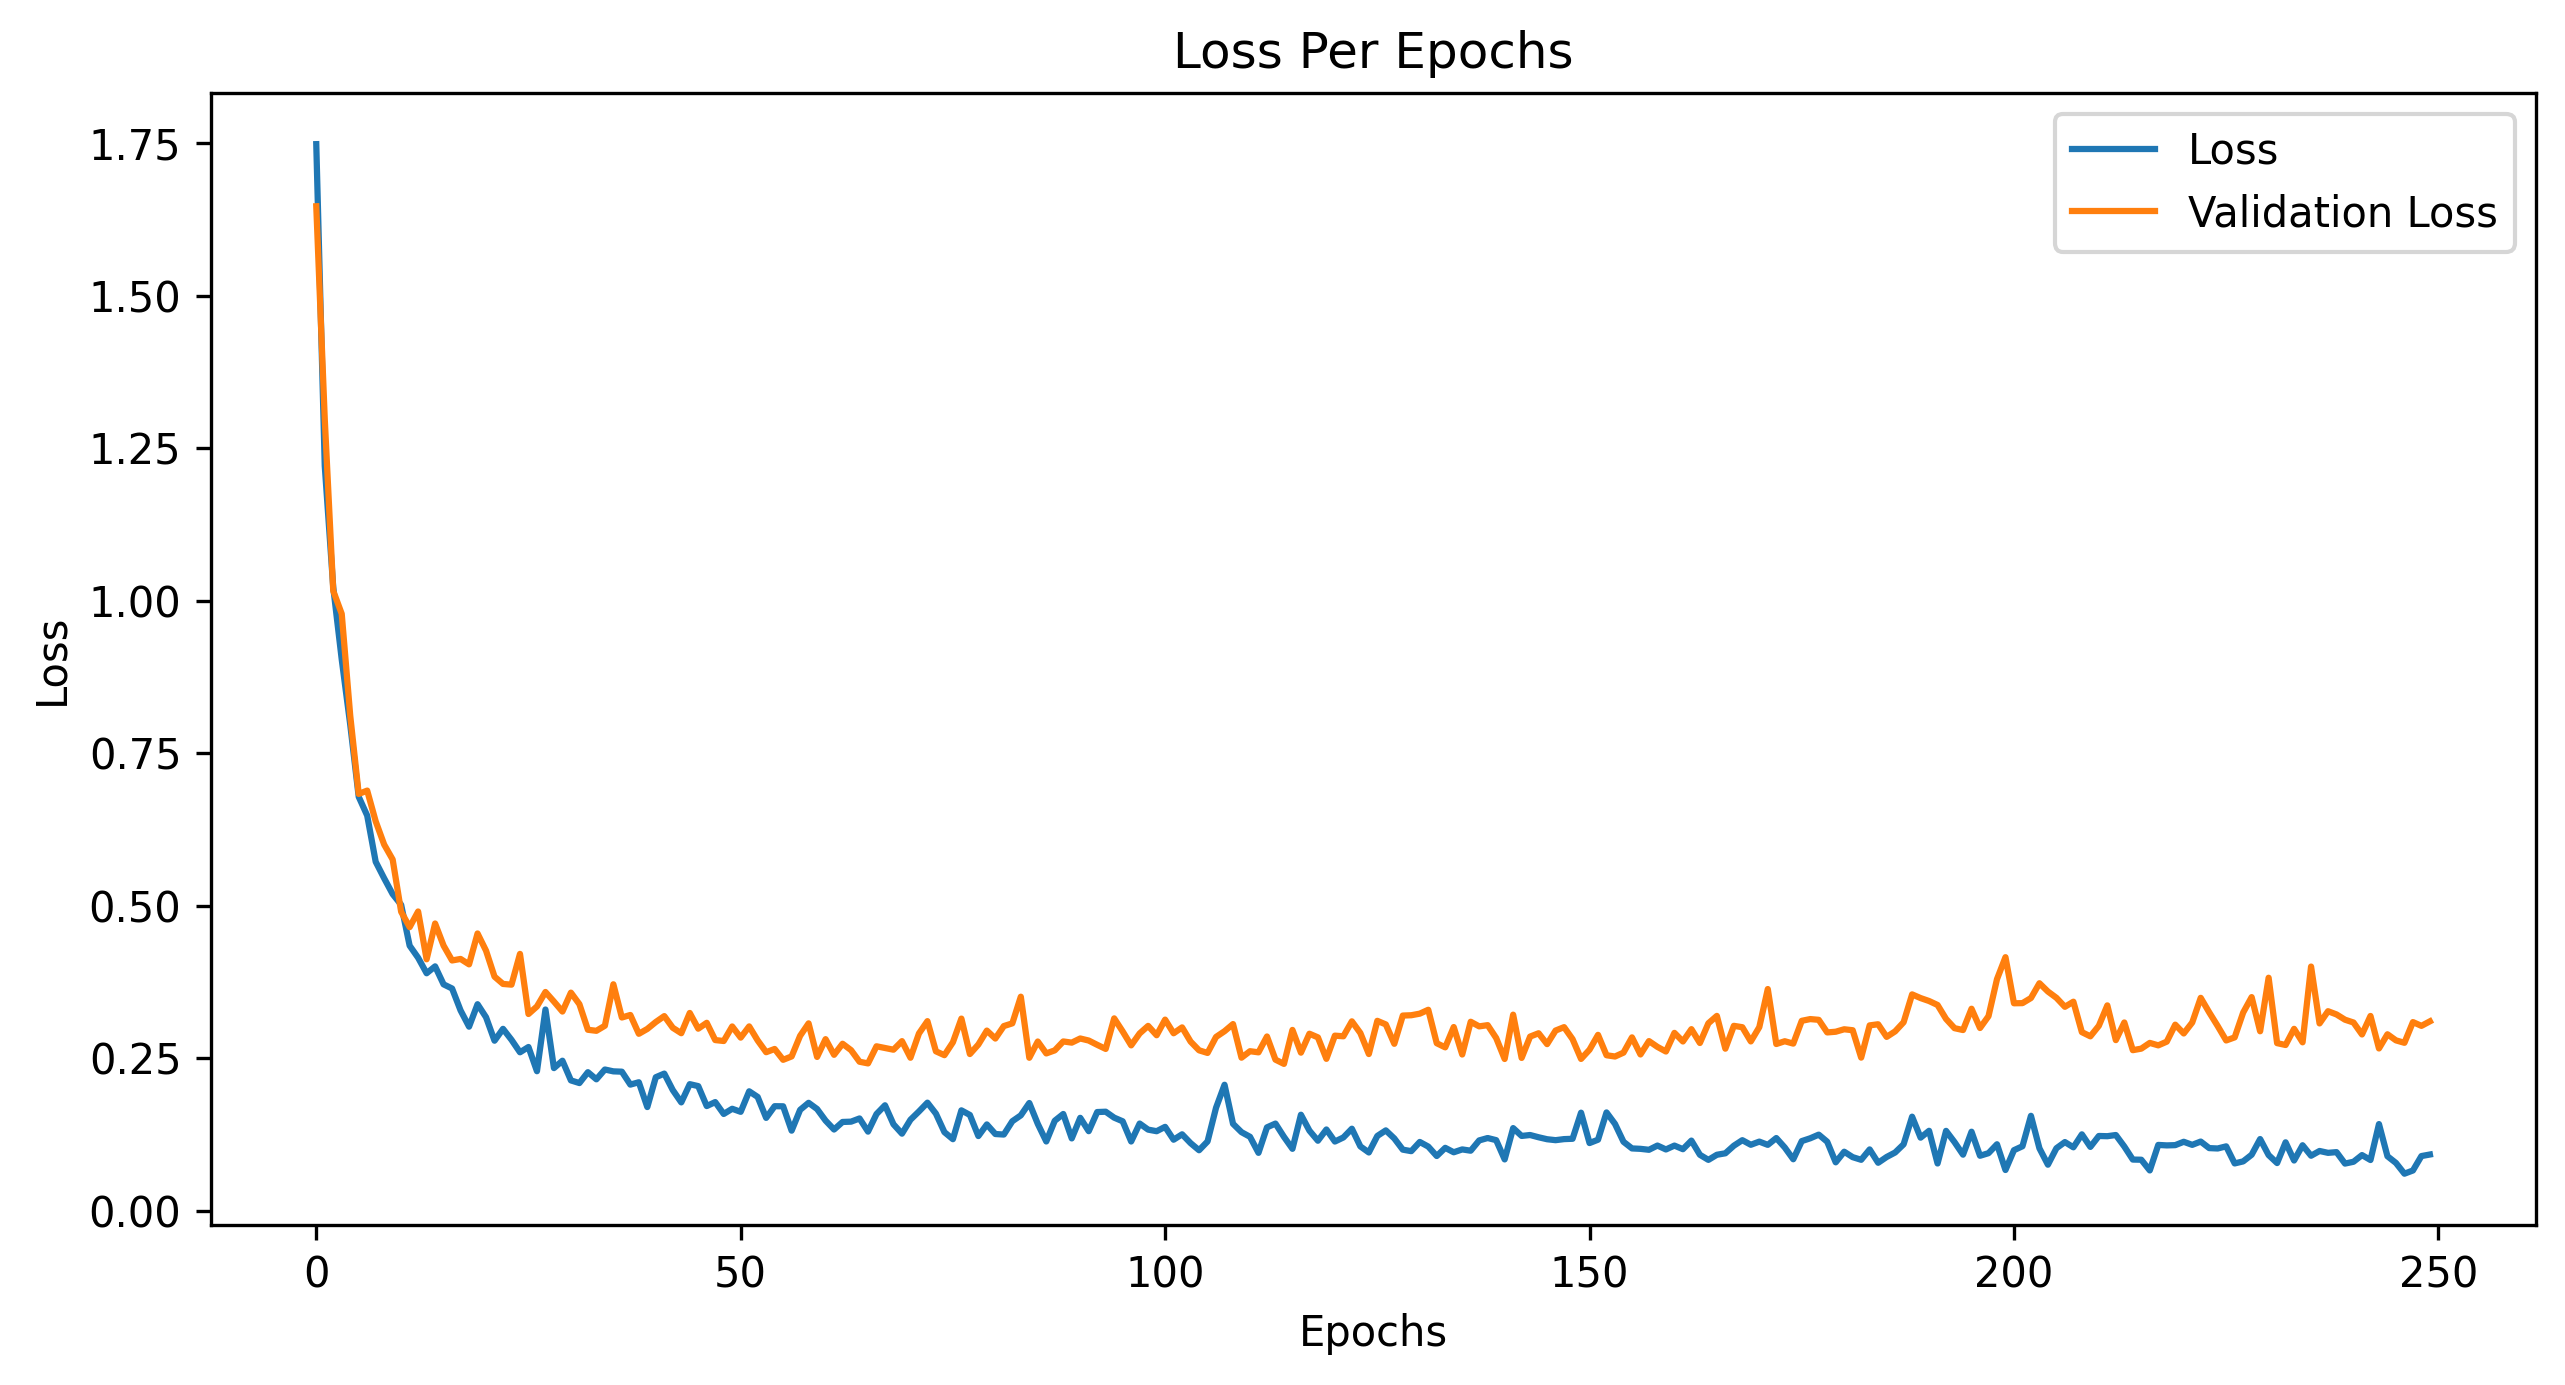

In [38]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

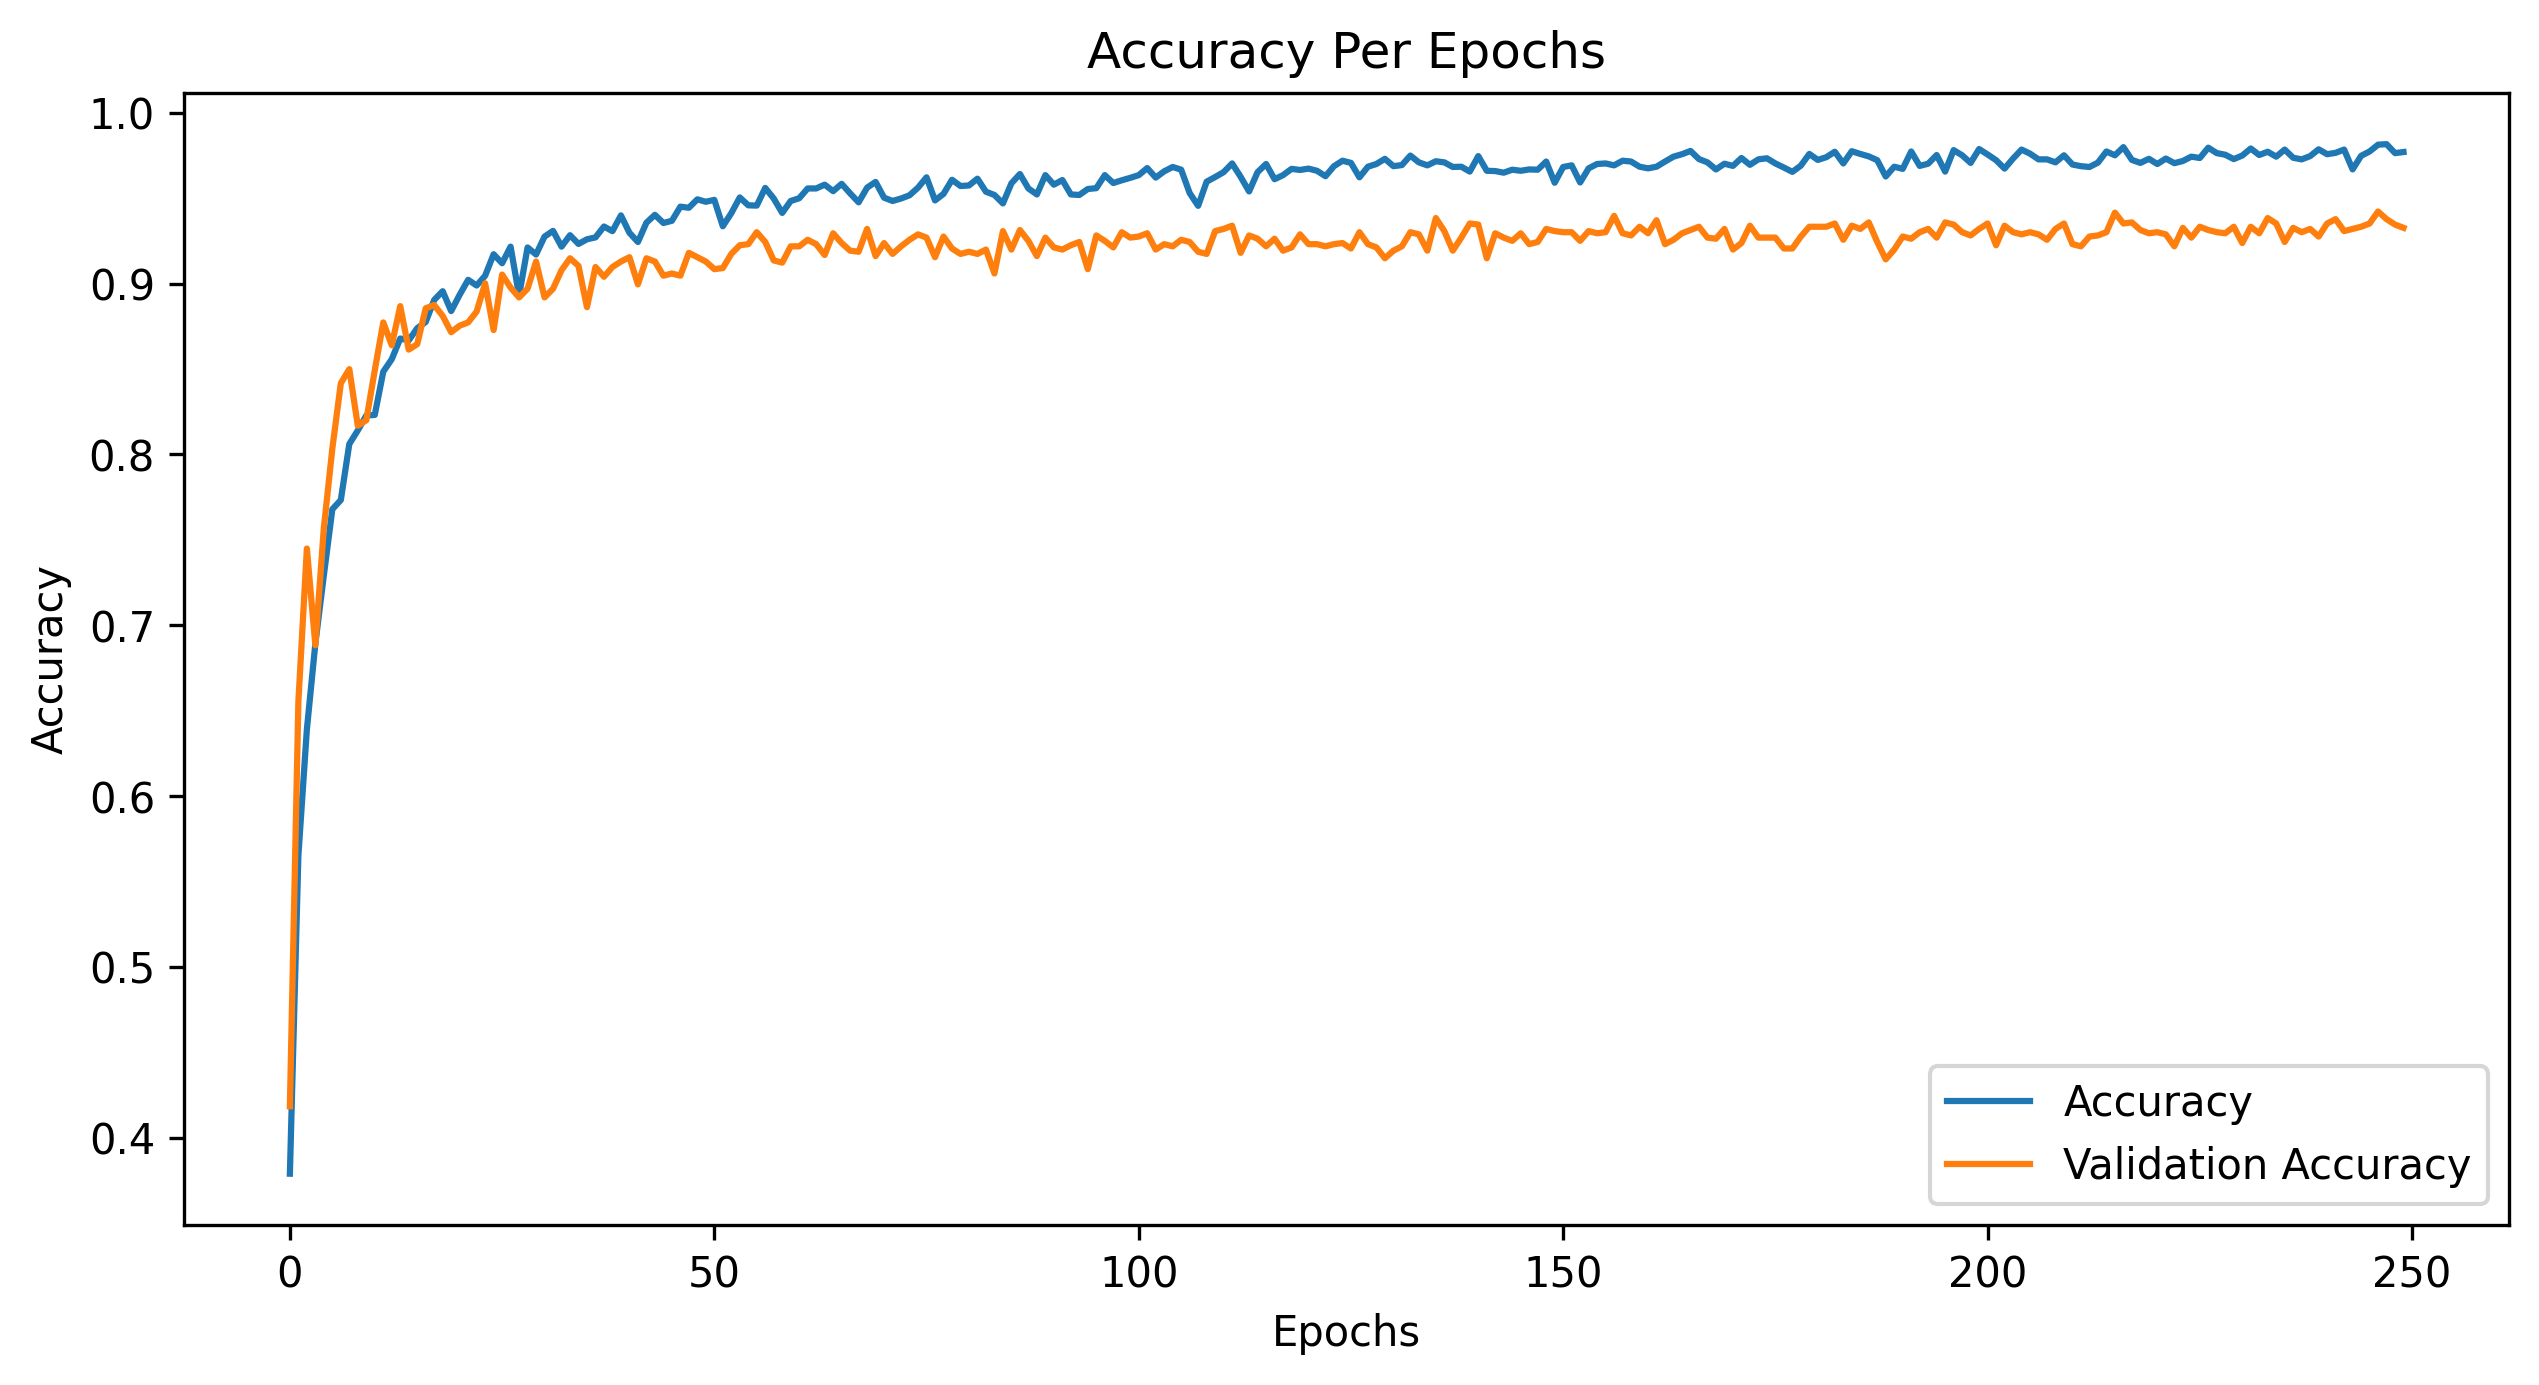

In [40]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## CNN1D Prediction Function


In [42]:
def CNN1D_Prediction(file_name):
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    feature_scaled = np.mean(feature.T, axis=0)
    prediction_feature = np.array([feature_scaled])
    final_prediction_feature = np.expand_dims(prediction_feature, axis=2)
    predicted_vector = np.argmax(CNN1D_Model.predict(final_prediction_feature), axis=-1)
    predicted_class = le.inverse_transform(predicted_vector)
    print("CNN1D has predicted the class as  --> ", predicted_class[0])

## Testing the Model on Sample audio


In [3]:
# fold8/103076-3-0-0.wav - Dog Bark
file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"

CNN1D_Prediction(file_name)

CNN1D has predicted the class as  -->  Dog Bark


# **Model 3 - CNN2D**


## Preprocessing


In [44]:
xtrain = xTrain.reshape(xTrain.shape[0], 16, 8, 1)
xtest = xTest.reshape(xTest.shape[0], 16, 8, 1)

print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", yTrain.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", yTest.shape)

The Shape of X Train (6286, 16, 8, 1)
The Shape of Y Train (6286, 10)
The Shape of X Test (874, 16, 8, 1)
The Shape of Y Test (874, 10)


## Building the CNN2D Model


In [45]:
CNN2D_Model = Sequential()
CNN2D_Model.add(
    Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1))
)
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.1))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(1024, activation="tanh"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)             

## Training the Model


In [47]:
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

t0 = time.time()

CNN2D_Results = CNN2D_Model.fit(
    xtrain, yTrain, epochs=250, batch_size=50, validation_data=(xtest, yTest)
)

CNN2D_Model.save("Model3.h5")
print("CNN2D Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)
train_m3 = round(time.time() - t0, 3)


Epoch 1/250
126/126 [==============================] - 3s 22ms/step - loss: 1.1752 - accuracy: 0.6010 - val_loss: 0.7415 - val_accuracy: 0.7586
Epoch 2/250
126/126 [==============================] - 3s 21ms/step - loss: 0.6257 - accuracy: 0.7906 - val_loss: 0.5181 - val_accuracy: 0.8307
Epoch 3/250
126/126 [==============================] - 3s 21ms/step - loss: 0.4247 - accuracy: 0.8610 - val_loss: 0.5537 - val_accuracy: 0.8284
Epoch 4/250
126/126 [==============================] - 3s 20ms/step - loss: 0.3050 - accuracy: 0.8980 - val_loss: 0.3796 - val_accuracy: 0.8741
Epoch 5/250
126/126 [==============================] - 2s 19ms/step - loss: 0.2378 - accuracy: 0.9200 - val_loss: 0.4052 - val_accuracy: 0.8730
Epoch 6/250
126/126 [==============================] - 3s 21ms/step - loss: 0.2142 - accuracy: 0.9306 - val_loss: 0.5049 - val_accuracy: 0.8570
Epoch 7/250
126/126 [==============================] - 4s 29ms/step - loss: 0.1740 - accuracy: 0.9415 - val_loss: 0.4704 - val_accuracy:

## Results


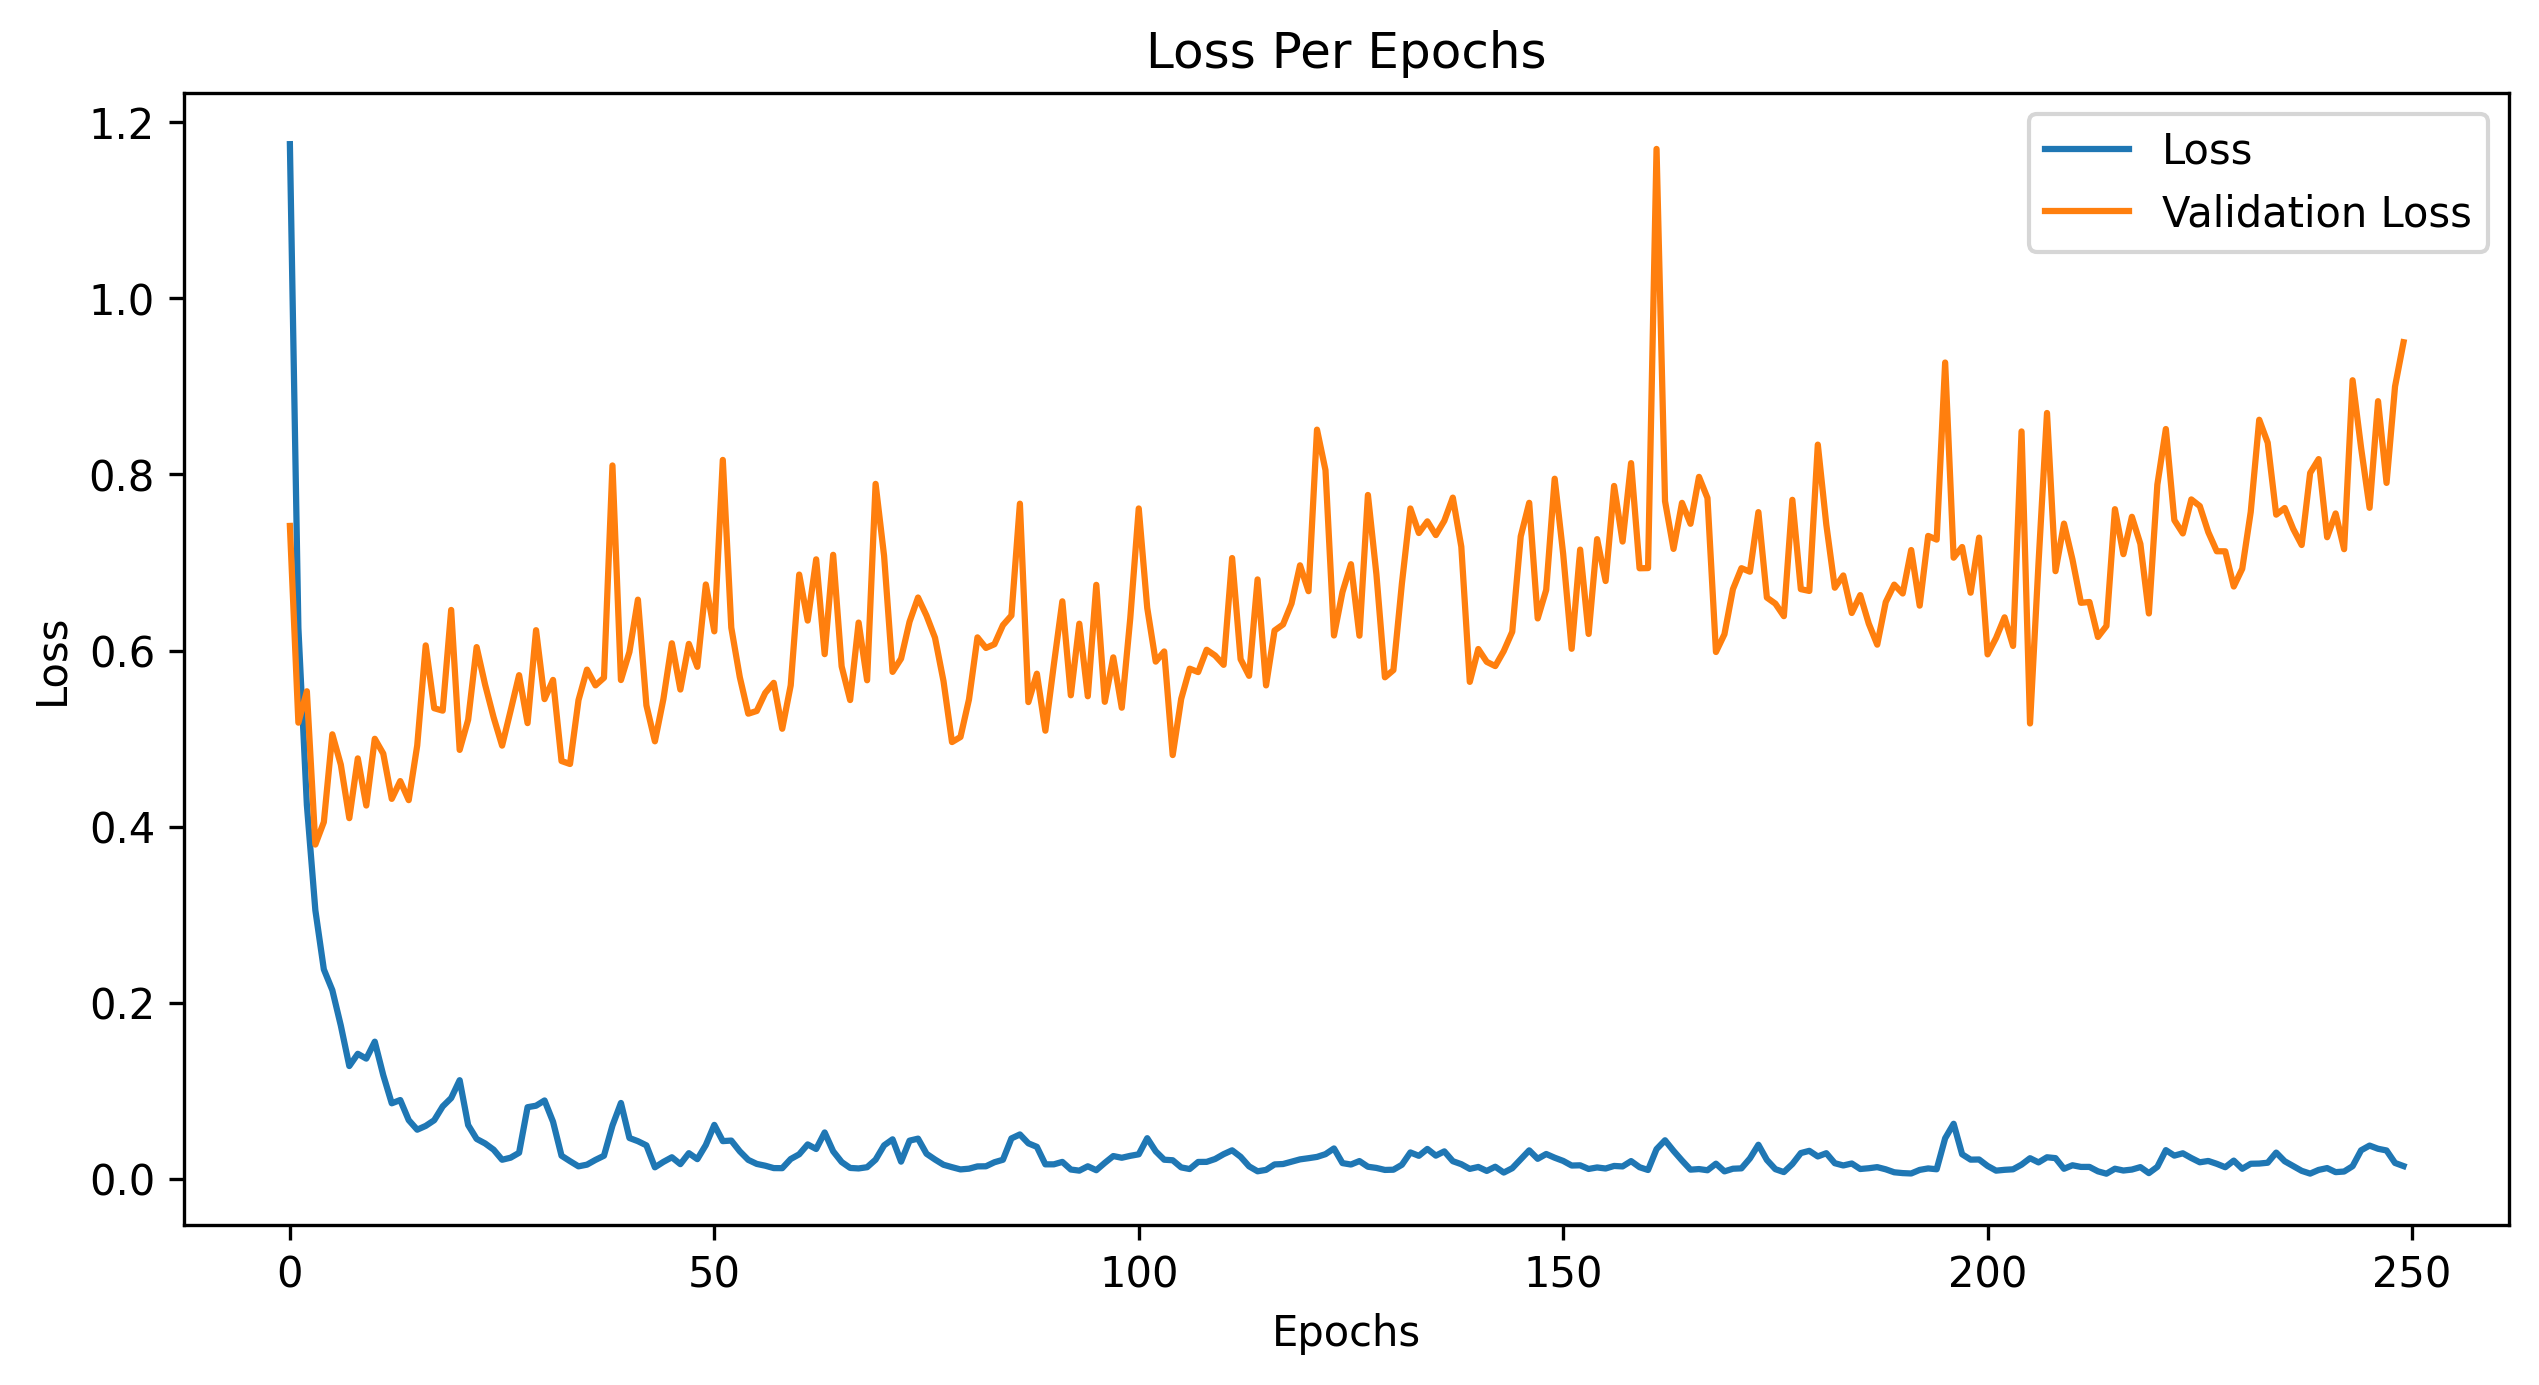

In [48]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

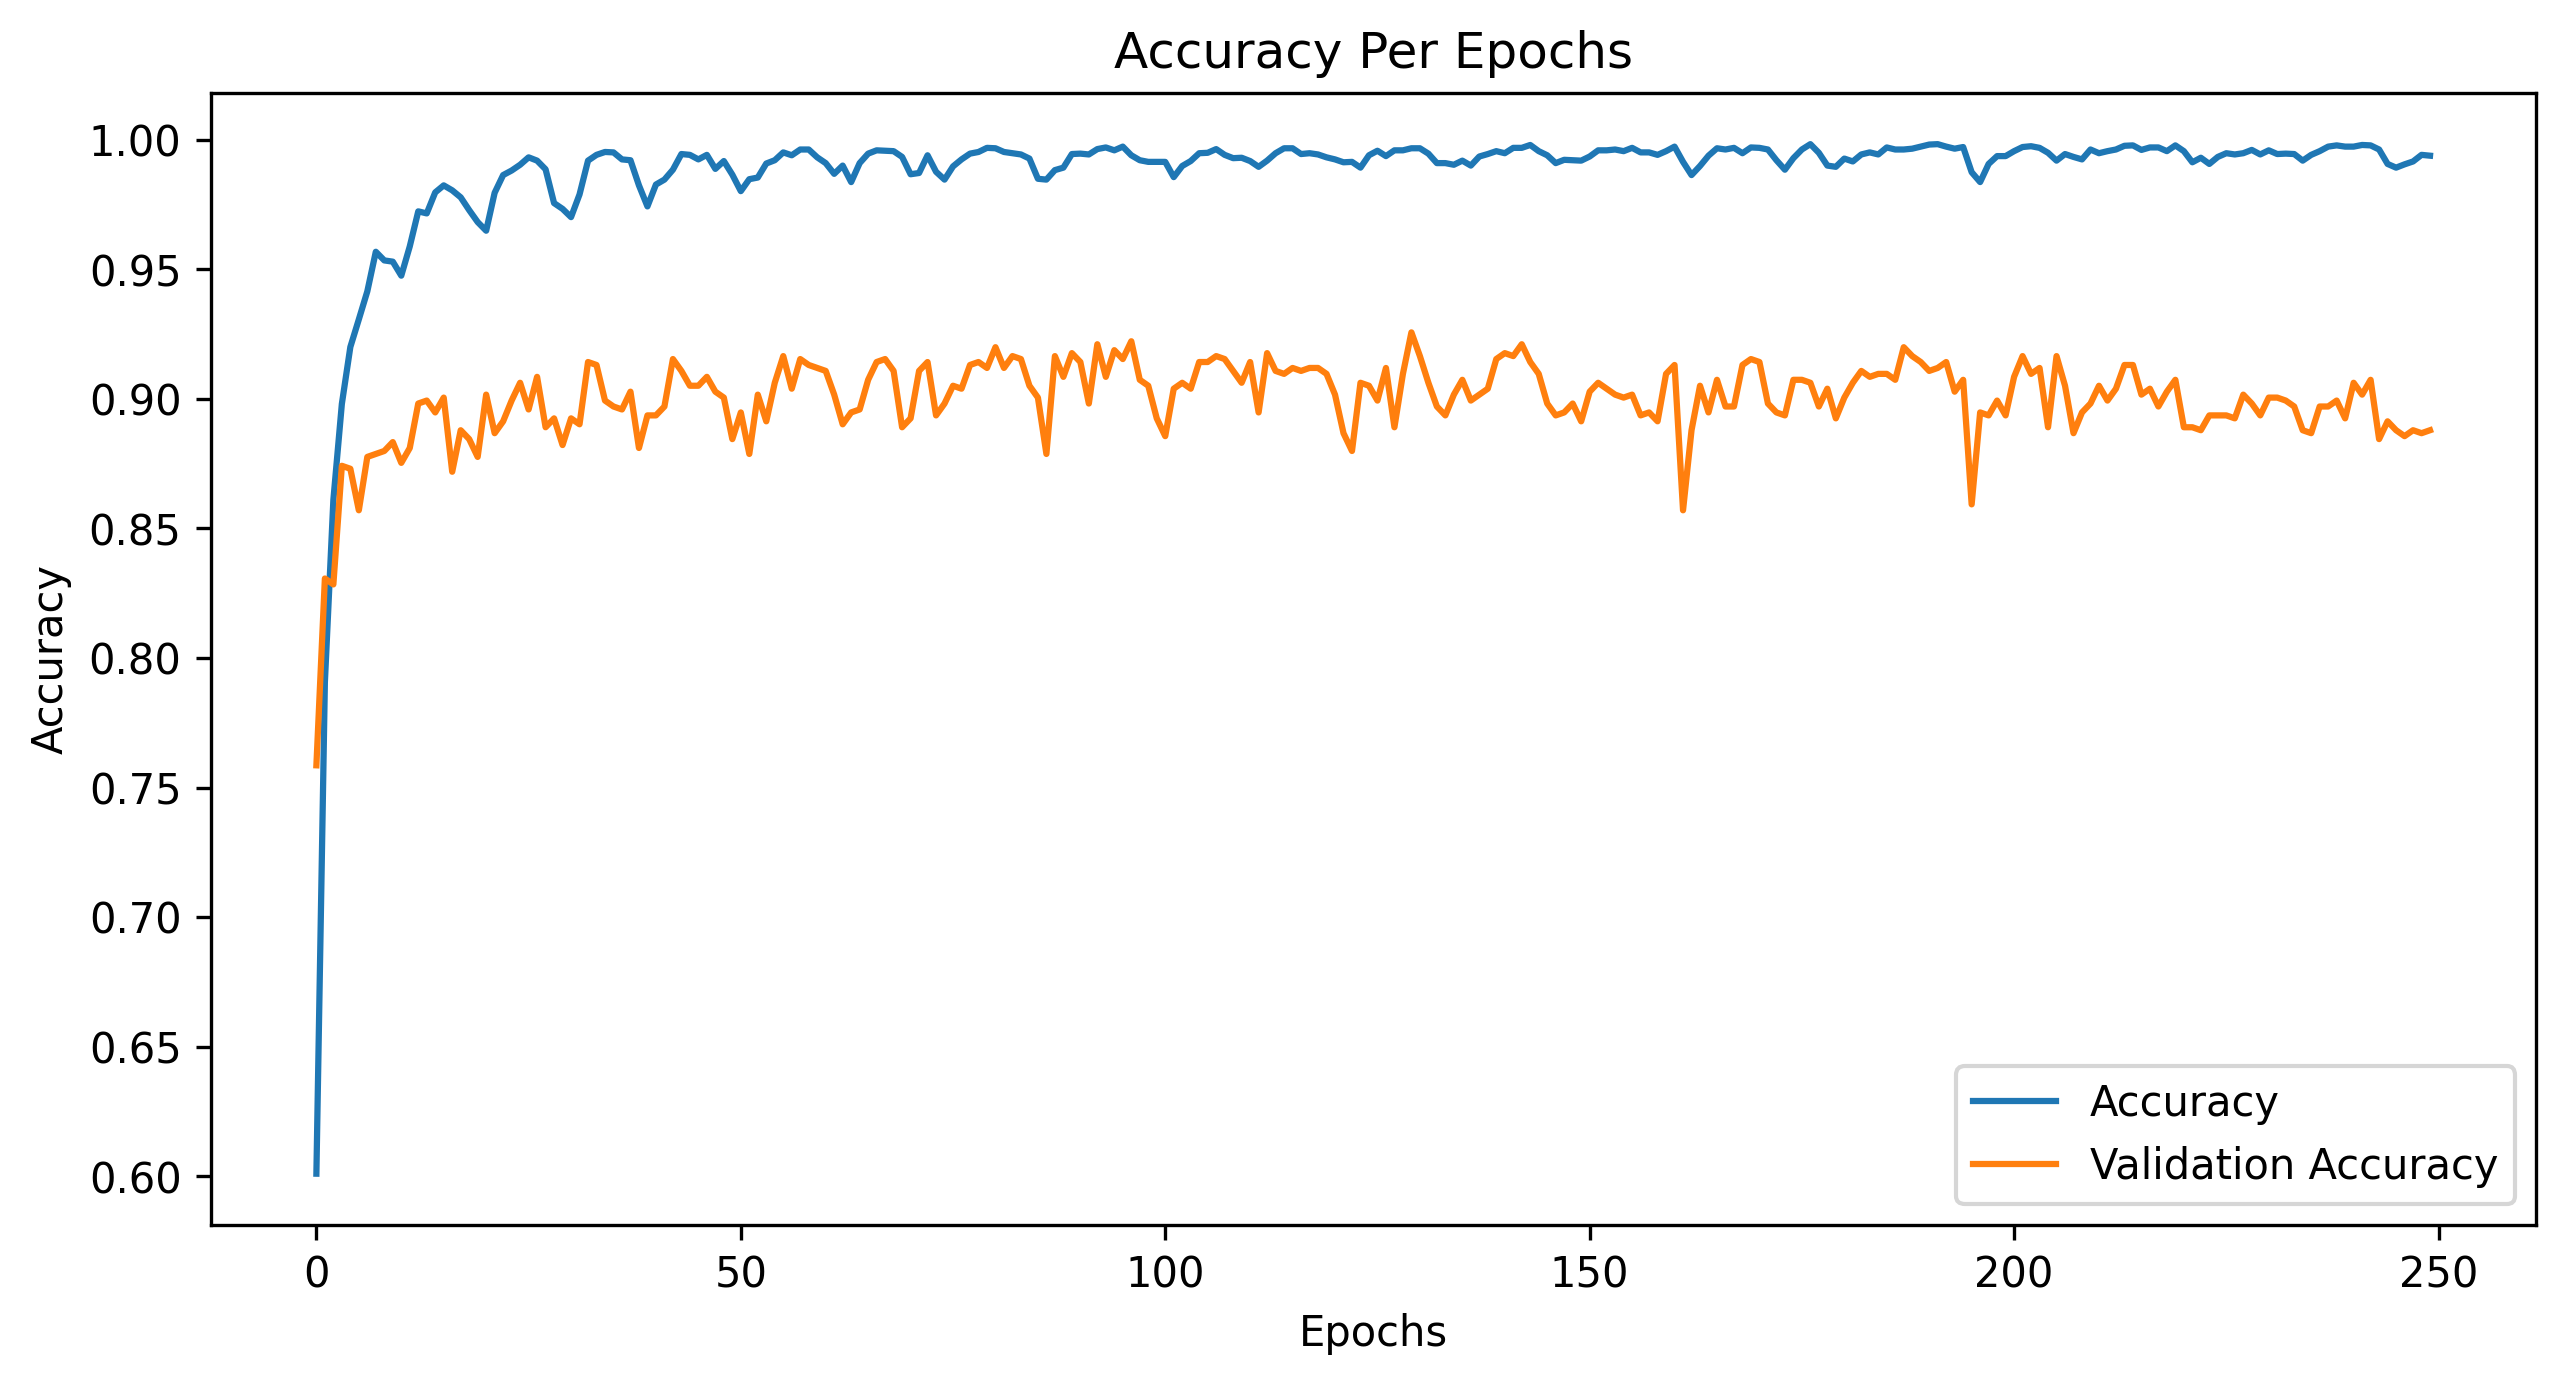

In [49]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## CNN2D Prediction Function


In [51]:
def CNN2D_Prediction(file_name):
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    feature_scaled = np.mean(feature.T, axis=0)
    prediction_feature = np.array([feature_scaled])
    final_prediction_feature = prediction_feature.reshape(
        prediction_feature.shape[0], 16, 8, 1
    )
    predicted_vector = np.argmax(CNN2D_Model.predict(final_prediction_feature), axis=-1)
    predicted_class = le.inverse_transform(predicted_vector)
    print("CNN2D has predicted the class as  --> ", predicted_class[0])

## Testing the Model on Sample audio


In [4]:
# fold8/103076-3-0-0.wav - Dog Bark
file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"

CNN2D_Prediction(file_name)

CNN2D has predicted the class as  -->  Dog Bark


# **Comparative Analysis**


In [54]:
plt.rcParams["figure.figsize"] = (17, 2)
plt.rcParams["figure.dpi"] = 550

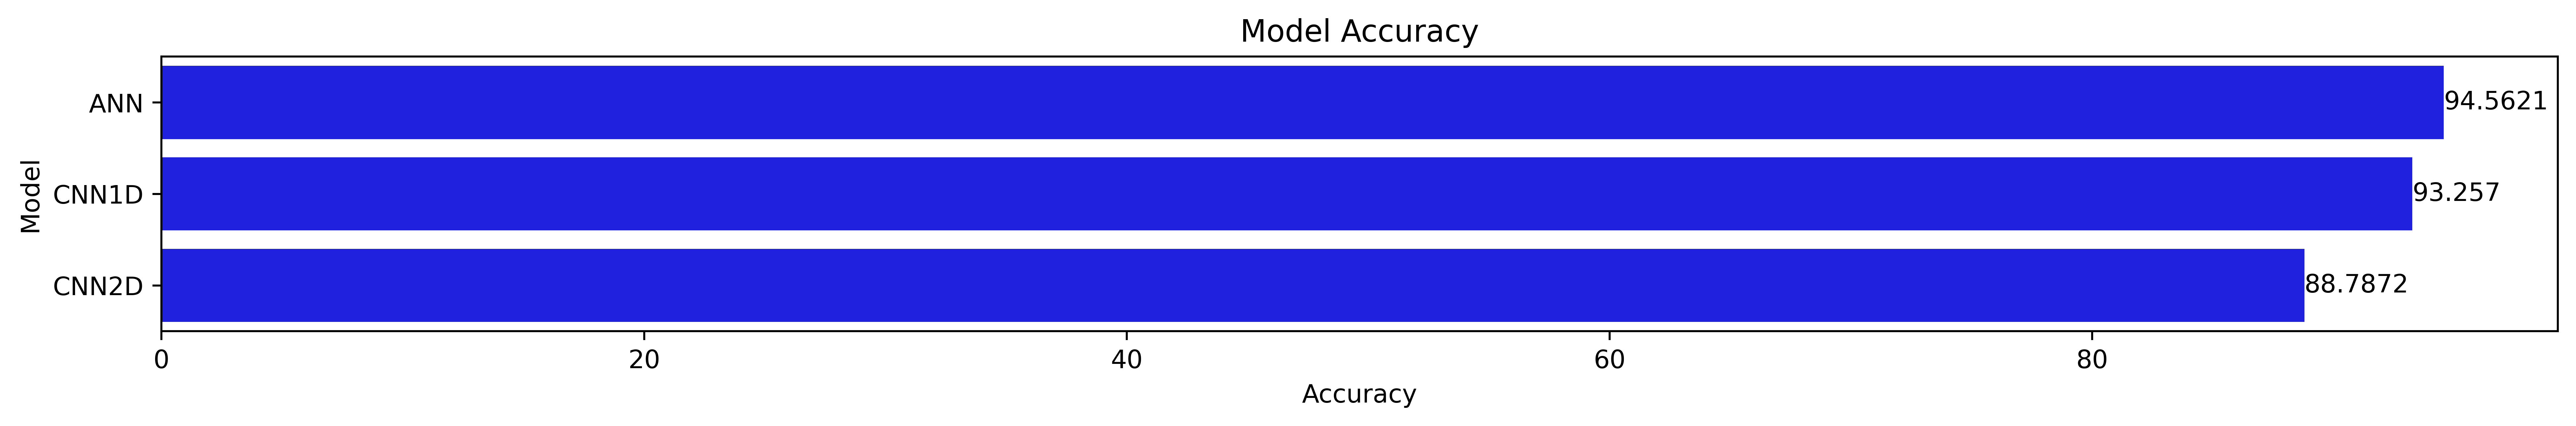

In [55]:
ax = sns.barplot(x="accuracy", y="model", data=log, color="b")
ax.bar_label(ax.containers[0])
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy")
plt.show()

ANN: Shows the highest accuracy at 94.56%. This suggests that for the given task and data, the ANN model is able to capture the relevant patterns most effectively.

CNN1D: Has a slightly lower accuracy at 93.26%, which is still very competitive. This indicates that the 1-D convolutional approach is nearly as effective as the ANN for this dataset.

CNN2D: Has the lowest accuracy at 88.79%. This could suggest that the 2-D convolutional model might not be as suitable for the audio features extracted, or it may require more tuning.

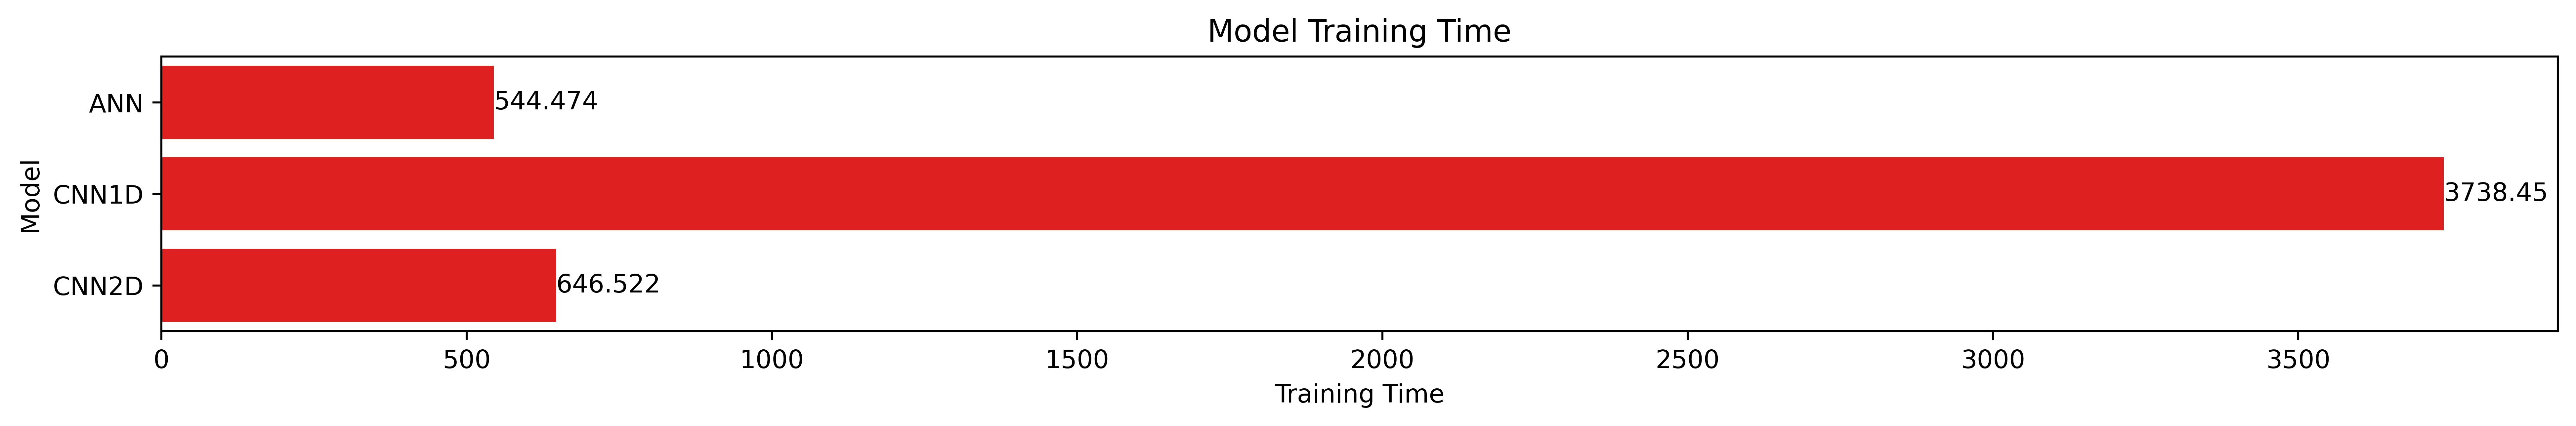

In [56]:
ax = sns.barplot(x="train_time", y="model", data=log, color="r")
ax.bar_label(ax.containers[0])
plt.xlabel("Training Time")
plt.ylabel("Model")
plt.title("Model Training Time")
plt.show()

ANN: Has a moderate training time of 544.47 seconds, which is significantly faster compared to the 2-D CNN.

CNN1D: Takes the longest to train at 3738.45 seconds. This is substantial and could be a downside if training speed is a critical factor.

CNN2D: Requires 646.52 seconds, which is more than the ANN but less than the 1-D CNN, making it a middle ground in terms of training efficiency.

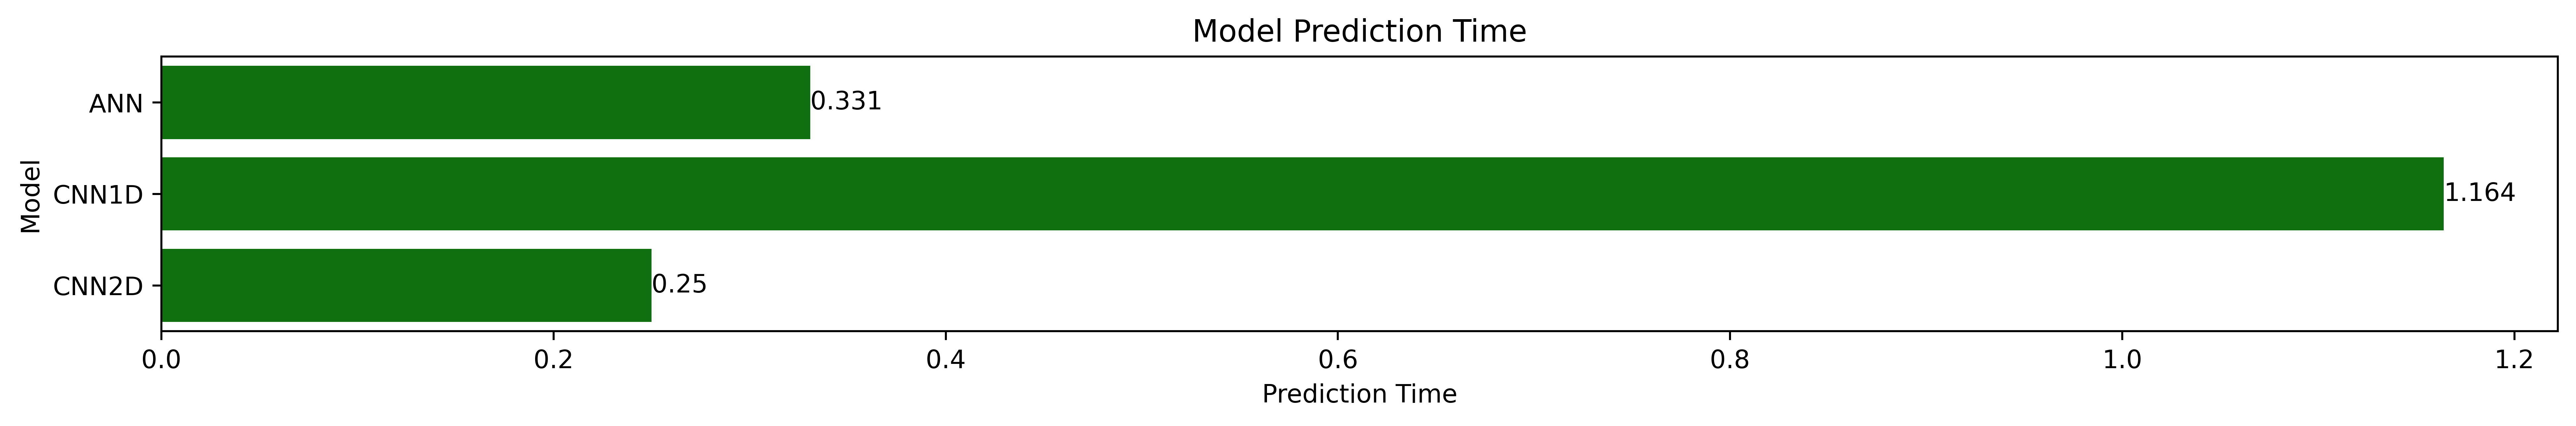

In [57]:
ax = sns.barplot(x="pred_time", y="model", data=log, color="g")
ax.bar_label(ax.containers[0])
plt.xlabel("Prediction Time")
plt.ylabel("Model")
plt.title("Model Prediction Time")
plt.show()

ANN: Offers the fastest prediction time at 0.331 seconds, making it highly efficient for real-time applications.

CNN1D: Has a slower prediction time of 0.25 seconds. Although slower than the ANN, it remains fairly efficient.

CNN2D: Has the slowest prediction time at 1.164 seconds. This could be a significant drawback if the model needs to be deployed in a real-time setting.

## Conclusion

ANN: Provides the best balance of high accuracy and quick prediction time, making it suitable for scenarios where both are critical. Its training time is also reasonably efficient.

CNN1D: Although it has the longest training time, its accuracy is commendable. This model might be more suited to scenarios where the slightly improved accuracy over 2-D CNN is critical, and training time is not a constraint.

CNN2D: While it doesn't excel in accuracy or prediction speed, it might still be considered for specific applications where 2-D spatial feature extraction from audio spectrograms is advantageous.